#### Problem 2: 
Implement Self-supervised learning using Momentum Con-
trast Encoder method (MoCO). Try 3 sets of augmentation methods. Implement a linear classifier on the learnt representations. 
Compare it with a full-blown CNN, that has the same number of parameters. Record the reduction in the amount of supervised data needed.

### MoCo Method Model Hyperparameters

| Hyperparameter     | Value                         |
|--------------------|-------------------------------|
| Architecture       | `resnet18`                    |
| Learning Rate (lr) | `0.03`                        |
| Epochs             | `50`                          |
| Cosine LR          | `True`                        |
| Batch Size         | `64`                          |
| Weight Decay (wd)  | `0.0005`                      |
| MoCo Dimension     | `128`                         |
| MoCo K             | `4096`                        |
| MoCo Momentum (m)  | `0.99`                        |
| MoCo Temperature (t) | `0.1`                       |
| BN Splits          | `8`                           |
| Symmetric Loss     | `False`                       |
| kNN K              | `200`                         |
| kNN Temperature    | `0.1`                         |


# KEY OBSERVATIONS (RESULTS):

### MoCo Model Training Results with Three Different Augmentation Sets (100% train data used)

| Augmentation Set | Transformations Code | Trainable Parameters | Epochs | Weighted-KNN Test Acc (%) | NN Linear Classifier Test Acc (%) | Linear SVM Test Acc (%) |
|------------------|----------------------|----------------------|--------|--------------------------|-----------------------------------|------------------------|
| Set 1: Basic Transformations with Color Jittering | `transforms.Compose([transforms.RandomResizedCrop(afhq_size), transforms.RandomHorizontalFlip(), transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])` | 11,242,176 | 50 | 95.67 | 89.00 | 88.46 |
| Set 2: Geometric Transformations | `transforms.Compose([transforms.RandomResizedCrop(afhq_size), transforms.RandomVerticalFlip(), transforms.RandomRotation(degrees=15), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])` | 11,242,176 | 50 | 84.00 | 62.00 | 47.47 |
| Set 3: Advanced Transformations | `transforms.Compose([transforms.RandomResizedCrop(afhq_size), transforms.RandomGrayscale(p=0.2), transforms.RandomPerspective(distortion_scale=0.5, p=0.5), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])` | 11,242,176 | 50 | 88.13 | 73.00 | 75.67 |



### Comparision between Full-Blown CNN Model (Supervised Learning) and NN Linear Classifier (with MoCO learnt representations): 
### Training Results with Varying Train Data Sizes
#### With Augmentation Set-1 used:

| Training Data Percentage | Number of Train Samples | Number of Validation/Test Samples | CNN Test Accuracy (%) (supervised learning) | Neural Network Linear Classifier Test Accuracy (%) (with MoCO learnt representations) | Number of Parameters |
|--------------------------|-------------------------|-----------------------------------|-----------------------|----------------------------------------|----------------------|
| 100%                     | 14630                   | 1500                              | 94%                   | 89%                                     | 11,242,176           |
| 90%                      | 13167                   | 1500                              | 96%                   | 90%                                     | 11,242,176           |
| 80%                      | 11704                   | 1500                              | 88%                   | 90%                                     | 11,242,176           |
| 70%                      | 10241                   | 1500                              | 91%                   | 90%                                     | 11,242,176           |
| 60%                      | 8778                    | 1500                              | 79%                   | 88%                                     | 11,242,176           |
| 50%                      | 7315                    | 1500                              | 90%                   | 88%                                     | 11,242,176           |
| 40%                      | 5852                    | 1500                              | 88%                   | 87%                                     | 11,242,176           |
| 30%                      | 4389                    | 1500                              | 89%                   | 86%                                     | 11,242,176           |
| 20%                      | 2926                    | 1500                              | 68%                   | 92%                                     | 11,242,176           |
| 10%                      | 1463                    | 1500                              | 64%                   | 89%                                     | 11,242,176           |


# KEY INSIGHTS:

## MoCo Method Model Experimentation

## PART (a): 
Implement Self-supervised learning using Momentum Contrast Encoder method (MoCo). Try 3 sets of augmentation methods. Implement a linear classifier on the learnt representations. 

### Overview
The experiment aimed to evaluate the effectiveness of different augmentation strategies in self-supervised learning using the Momentum Contrast Encoder (MoCo) method. Three distinct sets of augmentations were implemented, and their impact on the MoCo model's performance was assessed. The key objective was to understand how various augmentation techniques influence the learning of representations and their subsequent application in linear classifiers.

### Experimentation Setup
- **Model Architecture**: ResNet-18 used for MoCo.
- **Training Epochs**: All models trained for 50 epochs.
- **Augmentation Sets Tested**:
  1. Basic Transformations with Color Jittering
  2. Geometric Transformations
  3. Advanced Transformations (Including Grayscale and Perspective Changes)

### Key Findings and Insights
- **Effectiveness of Basic Transformations**:
  - The basic transformations with color jittering achieved the highest accuracy across all metrics.
  - Weighted-KNN Test Accuracy: 95.67%
  - NN Linear Classifier Test Accuracy: 89%
  - Linear SVM Test Accuracy: 88.46%
  - **Insight**: Basic yet diverse color and spatial modifications provide a balanced approach to learning robust features without overfitting to specific transformations.

- **Impact of Geometric Transformations**:
  - Geometric transformations led to a significant drop in performance.
  - Weighted-KNN Test Accuracy: 84.00%
  - NN Linear Classifier Test Accuracy: 62.00%
  - Linear SVM Test Accuracy: 47.47%
  - **Insight**: Overemphasis on geometric changes might lead to learning less generalizable features, indicating a potential misalignment between these transformations and the dataset's intrinsic properties.

- **Advanced Transformations and Their Limitations**:
  - While better than geometric transformations, advanced augmentations including grayscale and perspective changes did not outperform the basic transformations.
  - Weighted-KNN Test Accuracy: 88.13%
  - NN Linear Classifier Test Accuracy: 73.00%
  - Linear SVM Test Accuracy: 75.67%
  - **Insight**: Incorporating grayscale might add robustness against color variations, but excessive or complex transformations like perspective changes could introduce unnecessary complexity, potentially detracting from learning essential features.

- **Classifier Comparison**:
  - **Weighted-KNN**: Exhibited high accuracy, especially with basic transformations. Its strength lies in its ability to make decisions based on a set of nearest neighbors, which is beneficial when the feature space is well-separated.
  - **Neural Network (NN) Linear Classifier**: Showed lower performance compared to Weighted-KNN. The NN classifier directly learns to map the feature space to output classes but may not capture the nuanced relationships as effectively as KNN in a complex feature space.
  - **Linear SVM**: Generally had the lowest performance. While powerful in finding optimal linear boundaries, SVM might struggle with the complex, high-dimensional feature space extracted by MoCo, especially in absence of clear linear separability.

### Conclusion
- **Optimal Augmentation Strategy**: Basic transformations with color jittering are recommended for similar tasks, as they strike an effective balance between diversity and relevance in feature learning.
- **Balancing Transformations**: It's crucial to balance the complexity and diversity of augmentations to ensure effective learning without overwhelming the model with overly specific or irrelevant features.
- **Customization Based on Dataset**: Augmentation strategies should be tailored to the specific characteristics of the dataset at hand. This customization is key in self-supervised learning where feature extraction is heavily dependent on input variations.
- **Classifier Selection**: The choice of classifier should align with the nature of the learned feature space. Weighted-KNN appears most adept at handling the nuanced feature space generated by MoCo, followed by NN linear classifiers, with linear SVMs potentially less suitable for complex, high-dimensional data. Note that, while the Weighted-KNN approach is insightful, training a **linear classifier on the frozen features** typically yields better accuracy.

This experimentation underscores the importance of carefully selecting augmentation strategies in self-supervised learning frameworks like MoCo, as they significantly impact the model's ability to learn generalizable and robust representations. Additionally, the choice of classifier plays a crucial role in how effectively these representations are translated into accurate predictions.

## MoCo vs. Full-Blown CNN: Efficiency of Learned Representations and Data Requirements

## PART (b):
Compare MoCo with a full-blown CNN, that has the same number of parameters. Record the reduction in the amount of supervised data needed. 

#### Overview
The experiment was designed to compare the performance of a self-supervised learning model using Momentum Contrast (MoCo) with a fully supervised convolutional neural network (CNN) of comparable complexity. The primary goal was to assess the reduction in the amount of labeled data required when using self-supervised learned representations against a fully supervised learning approach. The experiment involved training a CNN model and NN Linear Classifier with learnt MoCO representations (using ResNet-18 architecture) with different proportions of the available training data.

#### Goal of the Experiment
The primary goal of the experiment was to identify how effectively a model trained using the MoCo method can perform compared to a fully supervised CNN model and, importantly, to determine the smallest amount of labeled data where the CNN matches or exceeds the MoCo model's performance. This comparison aims to understand the efficiency of self-supervised learning in reducing the dependency on large labeled datasets.

#### Key Findings and Insights

- **Stability in MoCo's Performance**: 
  - The MoCo model, with its self-supervised learned representations, displayed remarkable stability in performance across varying sizes of labeled data used for the linear classifier. This suggests that once good representations are learned, they can be effectively used even with smaller labeled datasets.
  
- **Performance Variability in CNN**:
  - The fully supervised CNN showed fluctuations in performance with decreasing amounts of training data, typically reducing accuracy as the data became scarcer. This is expected as supervised models rely heavily on the quantity and quality of labeled data.
  
  
- **Performance Fluctuations**:
  - The fluctuations in test accuracies for both models can be attributed to the varying complexity of features learned at different data scales and the inherent variability in smaller datasets. Notably, the test sample size remaining constant while training size decreased might have also affected the perceived stability and generalizability of the model.

- **Reduction in Supervised Labeled Data**: 
  - The experiment demonstrated that a well-trained MoCo model requires less labeled data to achieve comparable or superior performance to a fully supervised CNN. For instance, the MoCo model's performance remained relatively stable or even improved with less data, while the fully supervised CNN's performance generally declined, highlighting the efficiency and robustness of self-supervised learned representations. This indicates that self-supervised learning can significantly reduce the need for large labeled datasets without compromising performance.
  
- **Recording the reduction in the amount of supervised data needed**:
   - Based on the experiments and observations from Table, the reduction in the amount of supervised data needed is **approximately 70%** (reduction from the full training dataset). This is observed as the fully supervised CNN's performance significantly drops below the MoCo-based model's performance when using less than 30% of the training data, while both achieve similar high accuracy levels with more than 30% of the training data.

#### Conclusions

- **Self-Supervised Learning Efficiency**: Self-supervised learning, particularly methods like MoCo, presents a compelling case for scenarios where labeled data is scarce or expensive to obtain. They provide a means to leverage unlabeled data effectively, reducing the reliance on extensive labeled datasets.
- **Balanced Approach**: While fully supervised learning remains a powerful approach, especially with ample data, integrating self-supervised pre-training can enhance performance and efficiency, especially as data availability decreases.


# IMPLEMENTATION:



#### Key Notes regarding Implementation:

* **Asymmetric vs. Symmetric Loss**: In its original implementation, MoCo leverages an *asymmetric* loss approach, where one image crop operates as the 'query' and the other as the 'key,' with backpropagation applied only to the 'query.' An alternative *symmetric* loss option, inspired by SimCLR/BYOL, is also available. This symmetric method calculates an additional loss by interchanging the roles of the two crops. Notably, the symmetric loss effectively doubles the impact compared to the asymmetric method when trained for the same number of epochs, which could influence comparative outcomes.

* **SplitBatchNorm for Simulating Multi-GPU Training**: The initial MoCo model was trained across 8 GPUs. To replicate multi-GPU BatchNorm behavior on a single GPU, we use SplitBatchNorm. By default, we set `--bn-splits` to 8, mimicking an 8-GPU setup. The setting `--bn-splits 1` would be comparable to using SyncBatchNorm in a multi-GPU scenario.

* **weighted-kNN Monitor**: This demonstration includes a kNN monitor during training for assessing performance on the test set. 



GPU settings.

In [1]:
gpu_info = !nvidia-smi -i 3
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

from datetime import datetime
from functools import partial
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models import resnet
from tqdm import tqdm
import argparse
import json
import math
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

Sun Dec 24 17:14:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.125.06   Driver Version: 525.125.06   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   3  NVIDIA A100-SXM...  On   | 00000000:4B:00.0 Off |                    0 |
| N/A   30C    P0    52W / 400W |     52MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Set arguments

In [2]:
import argparse
from datetime import datetime

parser = argparse.ArgumentParser(description='Train MoCo on AFHQ Dataset')

# Architecture: Consider using a more complex model for higher-resolution images
parser.add_argument('-a', '--arch', default='resnet18')

# Learning Rate: Adjust based on experimentation
parser.add_argument('--lr', '--learning-rate', default=0.03, type=float, metavar='LR', help='initial learning rate', dest='lr')

# Epochs: May need adjustment based on dataset size and complexity
parser.add_argument('--epochs', default=100, type=int, metavar='N', help='number of total epochs to run')

# Learning rate schedule: Keep as is or adjust based on performance
parser.add_argument('--schedule', default=[120, 160], nargs='*', type=int, help='learning rate schedule (when to drop lr by 10x); does not take effect if --cos is on')
parser.add_argument('--cos', action='store_true', help='use cosine lr schedule')

# Batch Size: Adjust if running out of memory, especially with larger images
parser.add_argument('--batch-size', default=64, type=int, metavar='N', help='mini-batch size')

# Weight Decay: Can remain as is
parser.add_argument('--wd', default=5e-4, type=float, metavar='W', help='weight decay')

# MoCo specific configurations: These can typically remain the same, but feel free to experiment
parser.add_argument('--moco-dim', default=128, type=int, help='feature dimension')
parser.add_argument('--moco-k', default=4096, type=int, help='queue size; number of negative keys')
parser.add_argument('--moco-m', default=0.99, type=float, help='moco momentum of updating key encoder')
parser.add_argument('--moco-t', default=0.1, type=float, help='softmax temperature')

# Batch Normalization: Adjust if using multiple GPUs
parser.add_argument('--bn-splits', default=8, type=int, help='simulate multi-gpu behavior of BatchNorm in one gpu; 1 is SyncBatchNorm in multi-gpu')

# Symmetric Loss: Keep as is or adjust based on model performance
parser.add_argument('--symmetric', action='store_true', help='use a symmetric loss function that backprops to both crops')

# kNN monitor: Adjust if necessary based on dataset size and specifics
parser.add_argument('--knn-k', default=200, type=int, help='k in kNN monitor')
parser.add_argument('--knn-t', default=0.1, type=float, help='softmax temperature in kNN monitor; could be different with moco-t')

# Utilities: Paths for resuming training and storing results
parser.add_argument('--resume', default='', type=str, metavar='PATH', help='path to latest checkpoint (default: none)')
parser.add_argument('--results-dir', default='', type=str, metavar='PATH', help='path to cache (default: none)')

# Set up arguments for Jupyter notebook
args = parser.parse_args('')

# Set command line arguments here when running in ipynb
args.epochs = 50
args.cos = True
args.schedule = []  # Using cosine learning rate schedule
args.symmetric = False

# Setting up results directory
if args.results_dir == '':
    args.results_dir = './moco-model_cache-' + datetime.now().strftime("%Y-%m-%d-%H-%M-%S-moco")

print(args)


Namespace(arch='resnet18', lr=0.03, epochs=50, schedule=[], cos=True, batch_size=64, wd=0.0005, moco_dim=128, moco_k=4096, moco_m=0.99, moco_t=0.1, bn_splits=8, symmetric=False, knn_k=200, knn_t=0.1, resume='', results_dir='./moco-model_cache-2023-12-24-17-14-15-moco')


### Define base encoder

In [3]:
# SplitBatchNorm: simulate multi-gpu behavior of BatchNorm in one gpu by splitting alone the batch dimension
# implementation adapted from https://github.com/davidcpage/cifar10-fast/blob/master/torch_backend.py
class SplitBatchNorm(nn.BatchNorm2d):
    def __init__(self, num_features, num_splits, **kw):
        super().__init__(num_features, **kw)
        self.num_splits = num_splits

    def forward(self, input):
        N, C, H, W = input.shape
        if self.training or not self.track_running_stats:
            running_mean_split = self.running_mean.repeat(self.num_splits)
            running_var_split = self.running_var.repeat(self.num_splits)
            outcome = nn.functional.batch_norm(
                input.view(-1, C * self.num_splits, H, W), running_mean_split, running_var_split,
                self.weight.repeat(self.num_splits), self.bias.repeat(self.num_splits),
                True, self.momentum, self.eps).view(N, C, H, W)
            self.running_mean.data.copy_(running_mean_split.view(self.num_splits, C).mean(dim=0))
            self.running_var.data.copy_(running_var_split.view(self.num_splits, C).mean(dim=0))
            return outcome
        else:
            return nn.functional.batch_norm(
                input, self.running_mean, self.running_var,
                self.weight, self.bias, False, self.momentum, self.eps)

class ModelBase(nn.Module):
    """
    Comparing with ImageNet ResNet recipe, it:
    (i) replaces conv1 with kernel=3, str=1  ## adjust
    (ii) removes pool1
    """
    def __init__(self, feature_dim=128, arch=None, bn_splits=16):
        super(ModelBase, self).__init__()

        # use split batchnorm
        norm_layer = partial(SplitBatchNorm, num_splits=bn_splits) if bn_splits > 1 else nn.BatchNorm2d
        resnet_arch = getattr(resnet, arch)
        net = resnet_arch(num_classes=feature_dim, norm_layer=norm_layer)

        self.net = []
        for name, module in net.named_children():
            if name == 'conv1':
                module = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False) #Adjusting for larger image size
            if isinstance(module, nn.MaxPool2d):
                continue
            if isinstance(module, nn.Linear):
                self.net.append(nn.Flatten(1))
            self.net.append(module)

        self.net = nn.Sequential(*self.net)

    def forward(self, x):
        x = self.net(x)
        # note: not normalized here
        return x

### Define MoCo wrapper

In [4]:
class ModelMoCo(nn.Module):
    def __init__(self, dim=128, K=4096, m=0.99, T=0.1, arch='resnet18', bn_splits=8, symmetric=True):
        super(ModelMoCo, self).__init__()

        self.K = K
        self.m = m
        self.T = T
        self.symmetric = symmetric

        # create the encoders
        self.encoder_q = ModelBase(feature_dim=dim, arch=arch, bn_splits=bn_splits)
        self.encoder_k = ModelBase(feature_dim=dim, arch=arch, bn_splits=bn_splits)

        for param_q, param_k in zip(self.encoder_q.parameters(), self.encoder_k.parameters()):
            param_k.data.copy_(param_q.data)  # initialize
            param_k.requires_grad = False  # not update by gradient

        # create the queue
        self.register_buffer("queue", torch.randn(dim, K))
        self.queue = nn.functional.normalize(self.queue, dim=0)

        self.register_buffer("queue_ptr", torch.zeros(1, dtype=torch.long))

    @torch.no_grad()
    def _momentum_update_key_encoder(self):
        """
        Momentum update of the key encoder
        """
        for param_q, param_k in zip(self.encoder_q.parameters(), self.encoder_k.parameters()):
            param_k.data = param_k.data * self.m + param_q.data * (1. - self.m)

    @torch.no_grad()
    def _dequeue_and_enqueue(self, keys):
        batch_size = keys.shape[0]

        ptr = int(self.queue_ptr)
        assert self.K % batch_size == 0  # for simplicity

        # replace the keys at ptr (dequeue and enqueue)
        self.queue[:, ptr:ptr + batch_size] = keys.t()  # transpose
        ptr = (ptr + batch_size) % self.K  # move pointer

        self.queue_ptr[0] = ptr

    @torch.no_grad()
    def _batch_shuffle_single_gpu(self, x):
        """
        Batch shuffle, for making use of BatchNorm.
        """
        # random shuffle index
        idx_shuffle = torch.randperm(x.shape[0]).cuda()

        # index for restoring
        idx_unshuffle = torch.argsort(idx_shuffle)

        return x[idx_shuffle], idx_unshuffle

    @torch.no_grad()
    def _batch_unshuffle_single_gpu(self, x, idx_unshuffle):
        """
        Undo batch shuffle.
        """
        return x[idx_unshuffle]

    def contrastive_loss(self, im_q, im_k):
        # compute query features
        q = self.encoder_q(im_q)  # queries: NxC
        q = nn.functional.normalize(q, dim=1)  # already normalized

        # compute key features
        with torch.no_grad():  # no gradient to keys
            # shuffle for making use of BN
            im_k_, idx_unshuffle = self._batch_shuffle_single_gpu(im_k)

            k = self.encoder_k(im_k_)  # keys: NxC
            k = nn.functional.normalize(k, dim=1)  # already normalized

            # undo shuffle
            k = self._batch_unshuffle_single_gpu(k, idx_unshuffle)

        # compute logits
        # Einstein sum is more intuitive
        # positive logits: Nx1
        l_pos = torch.einsum('nc,nc->n', [q, k]).unsqueeze(-1)
        # negative logits: NxK
        l_neg = torch.einsum('nc,ck->nk', [q, self.queue.clone().detach()])

        # logits: Nx(1+K)
        logits = torch.cat([l_pos, l_neg], dim=1)

        # apply temperature
        logits /= self.T

        # labels: positive key indicators
        labels = torch.zeros(logits.shape[0], dtype=torch.long).cuda()

        loss = nn.CrossEntropyLoss().cuda()(logits, labels)

        return loss, q, k

    def forward(self, im1, im2):
        """
        Input:
            im_q: a batch of query images
            im_k: a batch of key images
        Output:
            loss
        """

        # update the key encoder
        with torch.no_grad():  # no gradient to keys
            self._momentum_update_key_encoder()

        # compute loss
        if self.symmetric:  # asymmetric loss
            loss_12, q1, k2 = self.contrastive_loss(im1, im2)
            loss_21, q2, k1 = self.contrastive_loss(im2, im1)
            loss = loss_12 + loss_21
            k = torch.cat([k1, k2], dim=0)
        else:  # asymmetric loss
            loss, q, k = self.contrastive_loss(im1, im2)

        self._dequeue_and_enqueue(k)

        return loss
    
    def extract_features(self, x):
        # Implement the logic to extract features from the input for linear classification tasks
        # This should be consistent with how your MoCo model is structured
        features = self.encoder_q.net[:-1](x)
        return features.view(features.size(0), -1)  
    

# create model
model = ModelMoCo(
        dim=args.moco_dim,
        K=args.moco_k,
        m=args.moco_m,
        T=args.moco_t,
        arch=args.arch,
        bn_splits=args.bn_splits,
        symmetric=args.symmetric,
    ).cuda()
print(model.encoder_q)

ModelBase(
  (net): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel

### Define Train and Test functions



In [5]:
from tqdm import tqdm
import math

def train(net, data_loader, train_optimizer, epoch, args):
    net.train()
    adjust_learning_rate(train_optimizer, epoch, args)

    total_loss, total_num = 0.0, 0
    train_bar = tqdm(data_loader)
    for im_1, im_2 in train_bar:
        im_1, im_2 = im_1.cuda(non_blocking=True), im_2.cuda(non_blocking=True)

        loss = net(im_1, im_2)

        train_optimizer.zero_grad()
        loss.backward()
        train_optimizer.step()

        batch_size = im_1.size(0)
        total_num += batch_size
        total_loss += loss.item() * batch_size
        train_bar.set_description('Train Epoch: [{}/{}], lr: {:.6f}, Loss: {:.4f}'.format(
            epoch, args.epochs, train_optimizer.param_groups[0]['lr'], total_loss / total_num))

    return total_loss / total_num

# lr scheduler for training
def adjust_learning_rate(optimizer, epoch, args):
    """Decay the learning rate based on schedule"""
    lr = args.lr
    if args.cos:  # cosine lr schedule
        lr *= 0.5 * (1. + math.cos(math.pi * epoch / args.epochs))
    else:  # stepwise lr schedule
        for milestone in args.schedule:
            lr *= 0.1 if epoch >= milestone else 1.
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


In [6]:
# test using a knn monitor
def test(net, memory_data_loader, test_data_loader, epoch, args):
    net.eval()
    classes = len(memory_data_loader.dataset.classes)  # 3 classes
    total_top1, total_top5, total_num, feature_bank = 0.0, 0.0, 0, []
    with torch.no_grad():
        # generate feature bank
        for data, target in tqdm(memory_data_loader, desc='Feature extracting'):  ## train data
            feature = net(data.cuda(non_blocking=True))
            feature = F.normalize(feature, dim=1)
            feature_bank.append(feature)
        # [D, N]
        feature_bank = torch.cat(feature_bank, dim=0).t().contiguous()
        # [N]
        feature_labels = torch.tensor(memory_data_loader.dataset.targets, device=feature_bank.device)
        
        
        # loop test data to predict the label by weighted knn search
        test_bar = tqdm(test_data_loader)
        
        
        for data, target in test_bar:   ## test data
            data, target = data.cuda(non_blocking=True), target.cuda(non_blocking=True)
            feature = net(data)
            feature = F.normalize(feature, dim=1)

            pred_labels = knn_predict(feature, feature_bank, feature_labels, classes, args.knn_k, args.knn_t)
          #  print(pred_labels.shape, target.shape)  # Add this line for debugging
            
            total_num += data.size(0)
            total_top1 += (pred_labels[:, 0] == target).float().sum().item()
            test_bar.set_description('Test Epoch: [{}/{}] KNN_Accuracy :{:.2f}%'.format(epoch, args.epochs, total_top1 / total_num * 100))

    return total_top1 / total_num * 100



# knn monitor as in InstDisc https://arxiv.org/abs/1805.01978
# implementation follows http://github.com/zhirongw/lemniscate.pytorch and https://github.com/leftthomas/SimCLR
def knn_predict(feature, feature_bank, feature_labels, classes, knn_k, knn_t):
    # compute cos similarity between each feature vector and feature bank ---> [B, N]
    sim_matrix = torch.mm(feature, feature_bank)
    # [B, K]
    sim_weight, sim_indices = sim_matrix.topk(k=knn_k, dim=-1)
    # [B, K]
    sim_labels = torch.gather(feature_labels.expand(feature.size(0), -1), dim=-1, index=sim_indices)
    sim_weight = (sim_weight / knn_t).exp()

    # counts for each class
    one_hot_label = torch.zeros(feature.size(0) * knn_k, classes, device=sim_labels.device)
    # [B*K, C]
    one_hot_label = one_hot_label.scatter(dim=-1, index=sim_labels.view(-1, 1), value=1.0)
    # weighted score ---> [B, C]
    pred_scores = torch.sum(one_hot_label.view(feature.size(0), -1, classes) * sim_weight.unsqueeze(dim=-1), dim=1)

    pred_labels = pred_scores.argsort(dim=-1, descending=True)
    return pred_labels

### Define data loaders and Augmentations

In [7]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            if self.is_test:
                img = self.transform(img)
                return img, target  # while KNN classification return targets
            else:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # no classes needed since self supervised so no need to return
            ## create/return two different "views" (random transforms/augmentations) of the same image

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    
    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images

# train_transform = transforms.Compose([
#     transforms.RandomResizedCrop(afhq_size),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Adjust normalization
# ])

## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Set 2: Geometric transformations
train_transform_2 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomVerticalFlip(),  # Randomly flips the image vertically
    transforms.RandomRotation(degrees=15),  # Randomly rotates the image by up to 15 degrees
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Set 3: Advanced transformations including grayscale and perspective changes
train_transform_3 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomGrayscale(p=0.2),  # Randomly converts images to grayscale with a probability of 0.2
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Randomly applies a perspective transformation
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])



# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)

# # Test data loader - using validation set
# test_data = AFHQPair(root='afhq/val', transform=test_transform)
# test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)



# (a) MoCO (Momentum Contrast Encoder method)
## (1) Start training MoCo (with Augmentation Set-1)

In [8]:
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr, weight_decay=args.wd, momentum=0.9)

# load model if resume
epoch_start = 1
if args.resume != '':
    checkpoint = torch.load(args.resume)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    epoch_start = checkpoint['epoch'] + 1
    print('Loaded from: {}'.format(args.resume))

# logging
results = {'train_loss': [], 'knn_test_acc': []}
if not os.path.exists(args.results_dir):
    os.mkdir(args.results_dir)
# dump args
with open(args.results_dir + '/args.json', 'w') as fid:
    json.dump(args.__dict__, fid, indent=2)

# training loop
for epoch in range(epoch_start, args.epochs + 1):
    train_loss = train(model, train_loader, optimizer, epoch, args)
    results['train_loss'].append(train_loss)
    
    #if(epoch==0 or (epoch+1)%5 == 0 or epoch == args.epochs-1):
    knn_test_acc = test(model.encoder_q, memory_loader, test_loader, epoch, args)
    results['knn_test_acc'].append(knn_test_acc)
    # save statistics
    data_frame = pd.DataFrame(data=results, index=range(epoch_start, epoch + 1))
    data_frame.to_csv(args.results_dir + '/log.csv', index_label='epoch')
    


Train Epoch: [23/50], lr: 0.016880, Loss: 4.4671: 100%|███████████████████████████████| 228/228 [00:25<00:00,  9.01it/s]


Feature extracting: 100%|█████████████████████████████████████████████████████████████| 229/229 [00:43<00:00,  5.31it/s]


Test Epoch: [50/50] KNN_Accuracy :95.07%: 100%|█████████████████████████████████████████| 24/24 [00:03<00:00,  6.18it/s]


In [9]:
# save model
torch.save({'epoch': epoch, 'state_dict': model.state_dict(), 'optimizer' : optimizer.state_dict(),}, args.results_dir + '/moco_model_Aug_1.pth')

### (i) Training the Neural Network Linear Classifier on learnt MoCO representations (100% train data)

In [19]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])


# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_1, train=False)  ## set 1
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




In [20]:

## load trained moco model  
model_path = 'moco-model_cache-2023-12-24-17-14-15-moco/moco_model_Aug_1.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")


Number of trainable parameters: 11242176


In [21]:
import numpy as np

## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM 
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)


In [22]:
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    
    

class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [23]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy


In [24]:
import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



In [25]:

# Load features and labels using the get_features_and_labels function  ## extract features same like for SVM, KNN
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



Epoch 1/50: Train Loss: 0.6965, Val Loss: 0.8663, Val Acc: 0.5633
Epoch 2/50: Train Loss: 0.4167, Val Loss: 0.7428, Val Acc: 0.7247
Epoch 3/50: Train Loss: 0.3289, Val Loss: 0.6896, Val Acc: 0.7340
Epoch 4/50: Train Loss: 0.2849, Val Loss: 0.6433, Val Acc: 0.7787
Epoch 5/50: Train Loss: 0.2576, Val Loss: 0.6084, Val Acc: 0.8033
Epoch 6/50: Train Loss: 0.2393, Val Loss: 0.5669, Val Acc: 0.8253
Epoch 7/50: Train Loss: 0.2260, Val Loss: 0.5576, Val Acc: 0.8200
Epoch 8/50: Train Loss: 0.2160, Val Loss: 0.5368, Val Acc: 0.8307
Epoch 9/50: Train Loss: 0.2074, Val Loss: 0.5151, Val Acc: 0.8440
Epoch 10/50: Train Loss: 0.2006, Val Loss: 0.5103, Val Acc: 0.8387
Epoch 11/50: Train Loss: 0.1951, Val Loss: 0.5063, Val Acc: 0.8333
Epoch 12/50: Train Loss: 0.1902, Val Loss: 0.4782, Val Acc: 0.8633
Epoch 13/50: Train Loss: 0.1857, Val Loss: 0.4848, Val Acc: 0.8420
Epoch 14/50: Train Loss: 0.1823, Val Loss: 0.4765, Val Acc: 0.8467
Epoch 15/50: Train Loss: 0.1792, Val Loss: 0.4638, Val Acc: 0.8553
Epoc

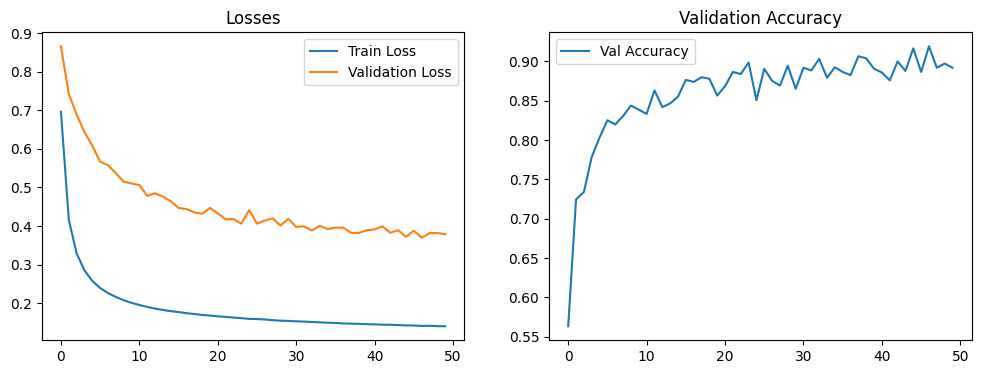

In [26]:
# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [27]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy: {test_accuracy:.2f}')


Test Accuracy: 0.89


### (ii) Test Accuracy Linear SVM Classifier

In [28]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np


def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels




# Load data using AFHQPair and DataLoader  ## same as linear classifier (neural network)
#train_features, train_labels = get_features_and_labels(model, classifier_train_loader)

# classifier_test_loader for testing dataset ## same as linear classifier (neural network)
#test_features, test_labels = get_features_and_labels(model, test_loader)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_features, train_labels)


# Predict and evaluate
predictions = svm_classifier.predict(test_features)
accuracy = accuracy_score(test_labels, predictions)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.8846666666666667


## (2) Start training MoCo (with Augmentation Set-2)

In [7]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            if self.is_test:
                img = self.transform(img)
                return img, target  # while KNN classification return targets
            else:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # no classes needed since self supervised so no need to return
            ## create/return two different "views" (random transforms/augmentations) of the same image

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    
    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images

# train_transform = transforms.Compose([
#     transforms.RandomResizedCrop(afhq_size),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Adjust normalization
# ])

## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Set 2: Geometric transformations
train_transform_2 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomVerticalFlip(),  # Randomly flips the image vertically
    transforms.RandomRotation(degrees=15),  # Randomly rotates the image by up to 15 degrees
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Set 3: Advanced transformations including grayscale and perspective changes
train_transform_3 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomGrayscale(p=0.2),  # Randomly converts images to grayscale with a probability of 0.2
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Randomly applies a perspective transformation
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])



# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_2) ## set 2
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)

# # Test data loader - using validation set
# test_data = AFHQPair(root='afhq/val', transform=test_transform)
# test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)



In [8]:
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr, weight_decay=args.wd, momentum=0.9)

# load model if resume
epoch_start = 1
if args.resume != '':
    checkpoint = torch.load(args.resume)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    epoch_start = checkpoint['epoch'] + 1
    print('Loaded from: {}'.format(args.resume))

# logging
results = {'train_loss': [], 'knn_test_acc': []}
if not os.path.exists(args.results_dir):
    os.mkdir(args.results_dir)
# dump args
with open(args.results_dir + '/2_args.json', 'w') as fid:
    json.dump(args.__dict__, fid, indent=2)

# training loop
for epoch in range(epoch_start, args.epochs + 1):
    train_loss = train(model, train_loader, optimizer, epoch, args)
    results['train_loss'].append(train_loss)
    
    #if(epoch==0 or (epoch+1)%5 == 0 or epoch == args.epochs-1):
    knn_test_acc = test(model.encoder_q, memory_loader, test_loader, epoch, args)
    results['knn_test_acc'].append(knn_test_acc)
    # save statistics
    data_frame = pd.DataFrame(data=results, index=range(epoch_start, epoch + 1))
    data_frame.to_csv(args.results_dir + '/2_log.csv', index_label='epoch')
    


Feature extracting: 100%|█████████████████████████████████████████████████████████████| 229/229 [01:07<00:00,  3.41it/s]


Test Epoch: [50/50] KNN_Accuracy :84.00%: 100%|█████████████████████████████████████████| 24/24 [00:07<00:00,  3.27it/s]


In [9]:
# save model
torch.save({'epoch': epoch, 'state_dict': model.state_dict(), 'optimizer' : optimizer.state_dict(),}, args.results_dir + '/moco_model_Aug_2.pth')

### (i) Training the Neural Network Linear Classifier on learnt MoCO representations (100% train data)

In [8]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 2: Geometric transformations
train_transform_2 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomVerticalFlip(),  # Randomly flips the image vertically
    transforms.RandomRotation(degrees=15),  # Randomly rotates the image by up to 15 degrees
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_2)  ## set 2
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_2, train=False)  ## set 2
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




In [9]:

## load trained moco model  
model_path = 'moco-model_cache-2023-12-09-07-19-56-moco/moco_model_Aug_2.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")


Number of trainable parameters: 11242176


In [10]:
import numpy as np


## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like NN(linear) and SVM
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)


In [11]:
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


## simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [12]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy


In [13]:
import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



In [14]:

# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



Epoch 1/50: Train Loss: 0.9075, Val Loss: 1.0010, Val Acc: 0.6447
Epoch 2/50: Train Loss: 0.7025, Val Loss: 0.9511, Val Acc: 0.6533
Epoch 3/50: Train Loss: 0.6088, Val Loss: 0.9195, Val Acc: 0.6620
Epoch 4/50: Train Loss: 0.5549, Val Loss: 0.8948, Val Acc: 0.6707
Epoch 5/50: Train Loss: 0.5186, Val Loss: 0.8751, Val Acc: 0.6793
Epoch 6/50: Train Loss: 0.4934, Val Loss: 0.8597, Val Acc: 0.6867
Epoch 7/50: Train Loss: 0.4743, Val Loss: 0.8476, Val Acc: 0.6893
Epoch 8/50: Train Loss: 0.4598, Val Loss: 0.8399, Val Acc: 0.6800
Epoch 9/50: Train Loss: 0.4474, Val Loss: 0.8312, Val Acc: 0.6840
Epoch 10/50: Train Loss: 0.4369, Val Loss: 0.8303, Val Acc: 0.6767
Epoch 11/50: Train Loss: 0.4285, Val Loss: 0.8205, Val Acc: 0.6793
Epoch 12/50: Train Loss: 0.4213, Val Loss: 0.8244, Val Acc: 0.6653
Epoch 13/50: Train Loss: 0.4145, Val Loss: 0.8092, Val Acc: 0.6833
Epoch 14/50: Train Loss: 0.4091, Val Loss: 0.8118, Val Acc: 0.6687
Epoch 15/50: Train Loss: 0.4035, Val Loss: 0.8038, Val Acc: 0.6727
Epoc

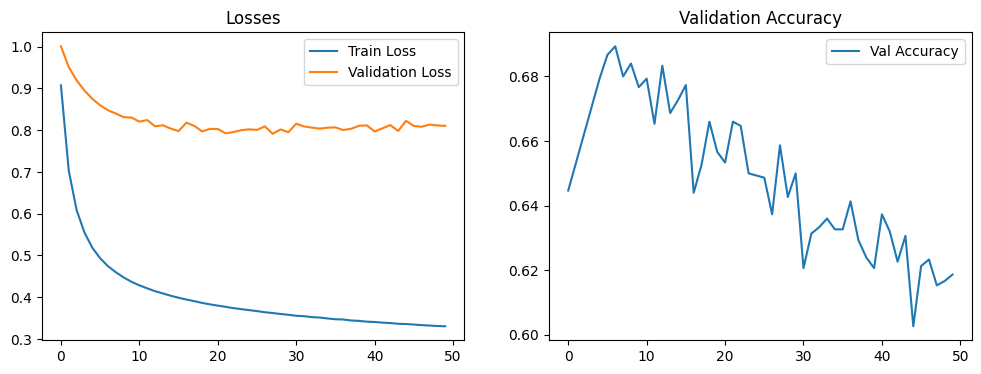

In [15]:
# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:7' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [16]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy: {test_accuracy:.2f}')


Test Accuracy: 0.62


### (ii) Test Accuracy Linear SVM Classifier

In [18]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np


def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels




# Load data using AFHQPair and DataLoader  ## same as linear classifier (neural network)
#train_features, train_labels = get_features_and_labels(model, classifier_train_loader)

# classifier_test_loader for testing dataset ## same as linear classifier (neural network)
#test_features, test_labels = get_features_and_labels(model, test_loader)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_features, train_labels)


# Predict and evaluate
predictions = svm_classifier.predict(test_features)
accuracy = accuracy_score(test_labels, predictions)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.4746666666666667


## (3) Start training MoCo (with Augmentation Set-3)

In [7]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            if self.is_test:
                img = self.transform(img)
                return img, target  # while KNN classification return targets
            else:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # no classes needed since self supervised so no need to return
            ## create/return two different "views" (random transforms/augmentations) of the same image

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    
    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images

# train_transform = transforms.Compose([
#     transforms.RandomResizedCrop(afhq_size),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Adjust normalization
# ])

## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Set 2: Geometric transformations
train_transform_2 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomVerticalFlip(),  # Randomly flips the image vertically
    transforms.RandomRotation(degrees=15),  # Randomly rotates the image by up to 15 degrees
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Set 3: Advanced transformations including grayscale and perspective changes
train_transform_3 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomGrayscale(p=0.2),  # Randomly converts images to grayscale with a probability of 0.2
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Randomly applies a perspective transformation
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])



# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_3)  ## set 3
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)

# # Test data loader - using validation set
# test_data = AFHQPair(root='afhq/val', transform=test_transform)
# test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)



In [8]:
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr, weight_decay=args.wd, momentum=0.9)

# load model if resume
epoch_start = 1
if args.resume != '':
    checkpoint = torch.load(args.resume)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    epoch_start = checkpoint['epoch'] + 1
    print('Loaded from: {}'.format(args.resume))

# logging
results = {'train_loss': [], 'knn_test_acc': []}
if not os.path.exists(args.results_dir):
    os.mkdir(args.results_dir)
# dump args
with open(args.results_dir + '/3_args.json', 'w') as fid:
    json.dump(args.__dict__, fid, indent=2)

# training loop
for epoch in range(epoch_start, args.epochs + 1):
    train_loss = train(model, train_loader, optimizer, epoch, args)
    results['train_loss'].append(train_loss)
    
    #if(epoch==0 or (epoch+1)%5 == 0 or epoch == args.epochs-1):
    knn_test_acc = test(model.encoder_q, memory_loader, test_loader, epoch, args)
    results['knn_test_acc'].append(knn_test_acc)
    # save statistics
    data_frame = pd.DataFrame(data=results, index=range(epoch_start, epoch + 1))
    data_frame.to_csv(args.results_dir + '/3_log.csv', index_label='epoch')
    


Feature extracting: 100%|█████████████████████████████████████████████████████████████| 229/229 [00:59<00:00,  3.87it/s]


Test Epoch: [50/50] KNN_Accuracy :87.87%: 100%|█████████████████████████████████████████| 24/24 [00:07<00:00,  3.38it/s]


In [11]:
# save model
torch.save({'epoch': epoch, 'state_dict': model.state_dict(), 'optimizer' : optimizer.state_dict(),}, args.results_dir + '/moco_model_Aug_3.pth')

### (i) Training the Neural Network Linear Classifier on learnt MoCO representations (100% train data)

In [19]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])


# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_3) ## set 3
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_3, train=False)  ## set 3
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




In [20]:

## load trained moco model  
model_path = 'moco-model_cache-2023-12-09-10-05-46-moco/moco_model_Aug_3.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")


Number of trainable parameters: 11242176


In [21]:
import numpy as np

## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like for SVM, KNN
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)


In [22]:
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    
    

## like fine-tuning Moco learnt representation Model with 100% data
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [23]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy


In [24]:
import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



In [25]:

# Load features and labels using the get_features_and_labels function  ## extract features same like for SVM, KNN
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



Epoch 1/50: Train Loss: 0.7610, Val Loss: 0.9003, Val Acc: 0.6847
Epoch 2/50: Train Loss: 0.5013, Val Loss: 0.8203, Val Acc: 0.7260
Epoch 3/50: Train Loss: 0.4122, Val Loss: 0.7933, Val Acc: 0.6860
Epoch 4/50: Train Loss: 0.3657, Val Loss: 0.7687, Val Acc: 0.6853
Epoch 5/50: Train Loss: 0.3359, Val Loss: 0.7453, Val Acc: 0.7020
Epoch 6/50: Train Loss: 0.3152, Val Loss: 0.7649, Val Acc: 0.6593
Epoch 7/50: Train Loss: 0.3006, Val Loss: 0.7364, Val Acc: 0.6860
Epoch 8/50: Train Loss: 0.2887, Val Loss: 0.7049, Val Acc: 0.7160
Epoch 9/50: Train Loss: 0.2793, Val Loss: 0.7210, Val Acc: 0.6913
Epoch 10/50: Train Loss: 0.2713, Val Loss: 0.7369, Val Acc: 0.6773
Epoch 11/50: Train Loss: 0.2649, Val Loss: 0.7219, Val Acc: 0.6880
Epoch 12/50: Train Loss: 0.2600, Val Loss: 0.6975, Val Acc: 0.7060
Epoch 13/50: Train Loss: 0.2551, Val Loss: 0.7033, Val Acc: 0.7013
Epoch 14/50: Train Loss: 0.2504, Val Loss: 0.6831, Val Acc: 0.7127
Epoch 15/50: Train Loss: 0.2470, Val Loss: 0.7060, Val Acc: 0.6940
Epoc

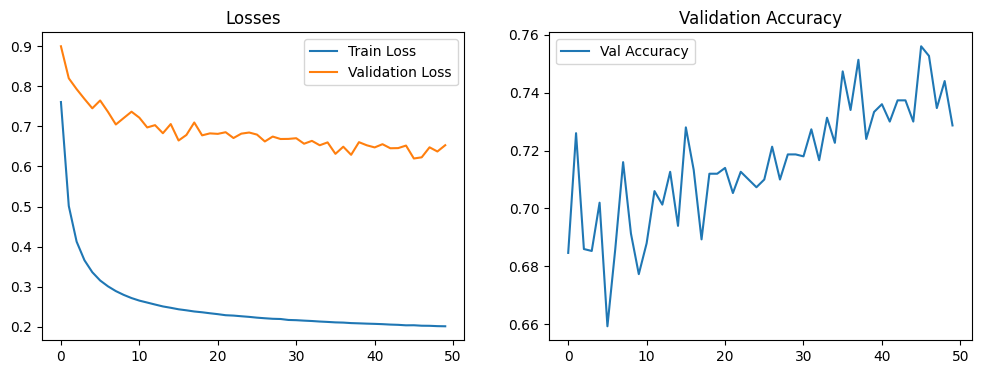

In [26]:
# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:7' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [27]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy: {test_accuracy:.2f}')


Test Accuracy: 0.73


### (ii) Test Accuracy Linear SVM Classifier

In [28]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np


def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels




# Load data using AFHQPair and DataLoader  ## same as linear classifier (neural network)
#train_features, train_labels = get_features_and_labels(model, classifier_train_loader)

# classifier_test_loader for testing dataset ## same as linear classifier (neural network)
#test_features, test_labels = get_features_and_labels(model, test_loader)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_features, train_labels)


# Predict and evaluate
predictions = svm_classifier.predict(test_features)
accuracy = accuracy_score(test_labels, predictions)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.7566666666666667


# (b) Compare MoCo with a full-blown CNN (ResNet-18), that has the same number of parameters.

In [7]:
## CNN: resnet18 architecture 
class ComparableCNN(nn.Module):
    def __init__(self, feature_dim=128, arch='resnet18'):
        super(ComparableCNN, self).__init__()
        # Initialize the ResNet architecture
        resnet_arch = getattr(resnet, arch)
        self.model = resnet_arch(num_classes=feature_dim)

    def forward(self, x):
        return self.model(x)
    
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Instantiate and count parameters
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
cnn_model = ComparableCNN(feature_dim=128, arch='resnet18').to(device)
print(f"Number of parameters in CNN: {count_parameters(cnn_model)}")


Number of parameters in CNN: 11242176


In [8]:
print(cnn_model)

ComparableCNN(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

### Using Augmentation Set-1 (which gave test highest accuracy with Linear classifier on Moco representations)

In [9]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None):
        super(AFHQPair, self).__init__(root, transform=transform)
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        for class_name, class_idx in self.class_to_idx.items():
            class_path = os.path.join(root, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(class_idx)

    def __getitem__(self, index):
        img_path = self.data[index]
        img = Image.open(img_path).convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
        return img, self.targets[index]  # CNN supervised training
 
    def __len__(self):
        return len(self.data)
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering  (got highest test accuracy with this)
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])


# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


print(f'Number of Train samples:{len(train_data)}')
print(f'Number of Test/Validation samples:{len(test_data)}')



Number of Train samples:14630
Number of Test/Validation samples:1500


In [10]:
def train_and_evaluate(model, train_loader, test_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        model.train()
        train_loss, train_correct, total_train = 0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_accuracy = train_correct / total_train
        avg_train_loss = train_loss / total_train
        train_losses.append(avg_train_loss)

        model.eval()
        val_loss, val_correct, total_val = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                val_correct += (predicted == labels).sum().item()
                total_val += labels.size(0)

        val_accuracy = val_correct / total_val
        avg_val_loss = val_loss / total_val
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
              f'Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

    return train_losses, val_losses, val_accuracies


### (i) Train CNN with 100% train data

In [12]:
from torch import optim

# Define loss function, optimizer, and number of training epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
epochs = 50  # Adjust as needed

# Train and evaluate the CNN
train_and_evaluate(cnn_model, train_loader, test_loader, optimizer, criterion, epochs, device)

Epoch 1/50: Train Loss: 0.8874, Train Accuracy: 0.5984, Val Loss: 1.1455, Val Accuracy: 0.4707
Epoch 2/50: Train Loss: 0.5730, Train Accuracy: 0.7601, Val Loss: 0.9483, Val Accuracy: 0.5493
Epoch 3/50: Train Loss: 0.4064, Train Accuracy: 0.8341, Val Loss: 1.4835, Val Accuracy: 0.4007
Epoch 4/50: Train Loss: 0.3171, Train Accuracy: 0.8727, Val Loss: 0.7555, Val Accuracy: 0.7007
Epoch 5/50: Train Loss: 0.2598, Train Accuracy: 0.8951, Val Loss: 0.7767, Val Accuracy: 0.6387
Epoch 6/50: Train Loss: 0.2291, Train Accuracy: 0.9105, Val Loss: 0.8382, Val Accuracy: 0.6140
Epoch 7/50: Train Loss: 0.2101, Train Accuracy: 0.9171, Val Loss: 0.8331, Val Accuracy: 0.6347
Epoch 8/50: Train Loss: 0.1963, Train Accuracy: 0.9228, Val Loss: 0.9811, Val Accuracy: 0.5240
Epoch 9/50: Train Loss: 0.1752, Train Accuracy: 0.9327, Val Loss: 0.6825, Val Accuracy: 0.6920
Epoch 10/50: Train Loss: 0.1608, Train Accuracy: 0.9365, Val Loss: 0.5798, Val Accuracy: 0.8060
Epoch 11/50: Train Loss: 0.1503, Train Accuracy: 

([0.8874075493791647,
  0.5730402109523615,
  0.4063697244253075,
  0.317103738259328,
  0.2598489932389113,
  0.22910674125478978,
  0.21007652548060082,
  0.19629274805386862,
  0.17522775151423717,
  0.1608499616727625,
  0.1503218070750958,
  0.15066367451493679,
  0.15072146007431703,
  0.13160267520467178,
  0.12157229157654863,
  0.12629887507411472,
  0.11297646384653554,
  0.11285309900791106,
  0.11060814914015825,
  0.10584799346530385,
  0.10855497110210229,
  0.09639493961769499,
  0.098145816961238,
  0.10250822936691213,
  0.08739719706538476,
  0.08941504161543491,
  0.0875547774597643,
  0.08602288872485556,
  0.08455906678072847,
  0.07816844303038363,
  0.08675319967146047,
  0.080971427510999,
  0.08127058294127908,
  0.07392039855639859,
  0.07718086498585251,
  0.07362343510204371,
  0.07725051481873124,
  0.07661788820813965,
  0.07534739595895078,
  0.07133829812805184,
  0.06883630894988432,
  0.06716591406515554,
  0.06362956062596488,
  0.06801010888854139,
 

In [15]:
# import matplotlib.pyplot as plt


# # Plotting
# plt.figure(figsize=(12, 5))

# # Plot training and validation loss
# plt.subplot(1, 2, 1)
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plot validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(val_accuracies, label='Validation Accuracy')
# plt.title('Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()


In [19]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(cnn_model, test_loader, device)
print(f'CNN Test Accuracy(with 100% train data): {test_accuracy:.2f}')


CNN Test Accuracy(with 100% train data): 0.94


### (ii) Train CNN with 90% train data

In [11]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 90% of the original size
reduced_train_data = create_reduced_dataset(train_data, 0.9)  ## 90% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:13167


In [12]:
from torch import optim

# Define loss function, optimizer, and number of training epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
epochs = 50  # Adjust as needed

# Train and evaluate the CNN
train_and_evaluate(cnn_model, reduced_train_loader, test_loader, optimizer, criterion, epochs, device)

Epoch 1/50: Train Loss: 0.9764, Train Accuracy: 0.5549, Val Loss: 1.0108, Val Accuracy: 0.4873
Epoch 2/50: Train Loss: 0.6917, Train Accuracy: 0.6940, Val Loss: 1.0277, Val Accuracy: 0.4767
Epoch 3/50: Train Loss: 0.5319, Train Accuracy: 0.7752, Val Loss: 1.0798, Val Accuracy: 0.5000
Epoch 4/50: Train Loss: 0.4027, Train Accuracy: 0.8348, Val Loss: 0.9123, Val Accuracy: 0.5820
Epoch 5/50: Train Loss: 0.3279, Train Accuracy: 0.8688, Val Loss: 0.8045, Val Accuracy: 0.6467
Epoch 6/50: Train Loss: 0.2780, Train Accuracy: 0.8917, Val Loss: 1.0169, Val Accuracy: 0.5460
Epoch 7/50: Train Loss: 0.2323, Train Accuracy: 0.9053, Val Loss: 0.9436, Val Accuracy: 0.5667
Epoch 8/50: Train Loss: 0.2143, Train Accuracy: 0.9177, Val Loss: 0.8077, Val Accuracy: 0.5860
Epoch 9/50: Train Loss: 0.1961, Train Accuracy: 0.9236, Val Loss: 0.7222, Val Accuracy: 0.6667
Epoch 10/50: Train Loss: 0.1796, Train Accuracy: 0.9333, Val Loss: 0.5915, Val Accuracy: 0.7780
Epoch 11/50: Train Loss: 0.1633, Train Accuracy: 

([0.9763745299199732,
  0.6917085582163276,
  0.5318633943069272,
  0.4026512977553577,
  0.32786732192446544,
  0.27801553381652366,
  0.23225818748881177,
  0.21430798765362763,
  0.19611219985456002,
  0.17958839390336012,
  0.16334752949272713,
  0.16030361552427455,
  0.14600704524030045,
  0.1522395684315664,
  0.13515656376030388,
  0.1278764566361177,
  0.13414777851686244,
  0.12098047204951688,
  0.1214432185106888,
  0.1258269623830551,
  0.11408713305505311,
  0.11185961139910831,
  0.1011235204411716,
  0.09634863569333059,
  0.098971481755285,
  0.09585601102288176,
  0.09535109974534774,
  0.10104412781756099,
  0.09812324353289313,
  0.0899183803533272,
  0.08695689290989099,
  0.09131866469524982,
  0.08264487087272289,
  0.08452908491216055,
  0.0869537823447367,
  0.08234931283925728,
  0.07894731018601395,
  0.07523649738783517,
  0.07168241595599528,
  0.07670614322556592,
  0.07671390493377679,
  0.07425579861624212,
  0.0723659038770853,
  0.07169520138513025,
  

In [14]:
# import matplotlib.pyplot as plt


# # Plotting
# plt.figure(figsize=(12, 5))

# # Plot training and validation loss
# plt.subplot(1, 2, 1)
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plot validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(val_accuracies, label='Validation Accuracy')
# plt.title('Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()


In [15]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(cnn_model, test_loader, device)
print(f'CNN Test Accuracy(with 90% train data): {test_accuracy:.2f}')


CNN Test Accuracy(with 90% train data): 0.96


### Train a Linear CLassifier with MoCO representations (on same 90% train data)

In [29]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)  ## set 1
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_1, train=False)  ## set 
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




## load trained moco model  
model_path = 'moco-model_cache-2023-12-24-17-14-15-moco/moco_model_Aug_1.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")



Number of trainable parameters: 11242176


In [30]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 90% of the original size
reduced_train_data = create_reduced_dataset(classifier_train_data, 0.9)  ## 90% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:13167


In [31]:
import numpy as np


## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like NN(linear) and SVM
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)




import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


## simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [32]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy



import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



Epoch 1/50: Train Loss: 0.7095, Val Loss: 0.8853, Val Acc: 0.5193
Epoch 2/50: Train Loss: 0.4217, Val Loss: 0.7640, Val Acc: 0.6720
Epoch 3/50: Train Loss: 0.3320, Val Loss: 0.6855, Val Acc: 0.7433
Epoch 4/50: Train Loss: 0.2869, Val Loss: 0.6383, Val Acc: 0.7873
Epoch 5/50: Train Loss: 0.2594, Val Loss: 0.6157, Val Acc: 0.7927
Epoch 6/50: Train Loss: 0.2410, Val Loss: 0.5817, Val Acc: 0.8067
Epoch 7/50: Train Loss: 0.2274, Val Loss: 0.5568, Val Acc: 0.8200
Epoch 8/50: Train Loss: 0.2175, Val Loss: 0.5281, Val Acc: 0.8427
Epoch 9/50: Train Loss: 0.2094, Val Loss: 0.5162, Val Acc: 0.8420
Epoch 10/50: Train Loss: 0.2026, Val Loss: 0.4989, Val Acc: 0.8533
Epoch 11/50: Train Loss: 0.1969, Val Loss: 0.4776, Val Acc: 0.8813
Epoch 12/50: Train Loss: 0.1921, Val Loss: 0.4864, Val Acc: 0.8493
Epoch 13/50: Train Loss: 0.1882, Val Loss: 0.4809, Val Acc: 0.8467
Epoch 14/50: Train Loss: 0.1847, Val Loss: 0.4652, Val Acc: 0.8680
Epoch 15/50: Train Loss: 0.1816, Val Loss: 0.4440, Val Acc: 0.8880
Epoc

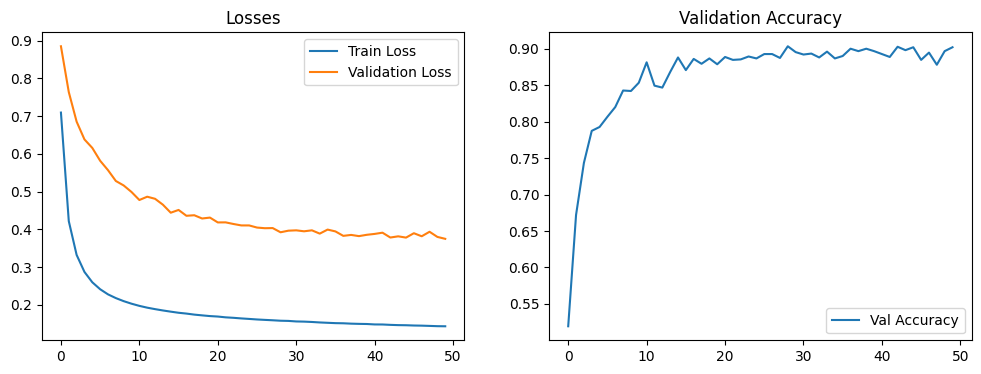

In [33]:

# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [34]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy: {test_accuracy:.2f}')


Test Accuracy: 0.90


### (iii) Train CNN with 80% train data

In [11]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 80% of the original size
reduced_train_data = create_reduced_dataset(train_data, 0.8)  ## 80% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:11704


In [12]:
from torch import optim

# Define loss function, optimizer, and number of training epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
epochs = 50  # Adjust as needed

# Train and evaluate the CNN
train_losses, val_losses, val_accuracies = train_and_evaluate(cnn_model, reduced_train_loader, test_loader, optimizer, criterion, epochs, device)

Epoch 1/50: Train Loss: 0.9660, Train Accuracy: 0.5590, Val Loss: 1.1304, Val Accuracy: 0.5140
Epoch 2/50: Train Loss: 0.6925, Train Accuracy: 0.6969, Val Loss: 1.3593, Val Accuracy: 0.3587
Epoch 3/50: Train Loss: 0.5301, Train Accuracy: 0.7789, Val Loss: 1.8669, Val Accuracy: 0.3413
Epoch 4/50: Train Loss: 0.4272, Train Accuracy: 0.8266, Val Loss: 1.2751, Val Accuracy: 0.3653
Epoch 5/50: Train Loss: 0.3483, Train Accuracy: 0.8623, Val Loss: 0.9327, Val Accuracy: 0.5100
Epoch 6/50: Train Loss: 0.2897, Train Accuracy: 0.8856, Val Loss: 0.8469, Val Accuracy: 0.6200
Epoch 7/50: Train Loss: 0.2520, Train Accuracy: 0.8997, Val Loss: 0.7820, Val Accuracy: 0.6913
Epoch 8/50: Train Loss: 0.2312, Train Accuracy: 0.9070, Val Loss: 0.8564, Val Accuracy: 0.5733
Epoch 9/50: Train Loss: 0.2132, Train Accuracy: 0.9185, Val Loss: 0.6757, Val Accuracy: 0.7647
Epoch 10/50: Train Loss: 0.2040, Train Accuracy: 0.9193, Val Loss: 0.7742, Val Accuracy: 0.6300
Epoch 11/50: Train Loss: 0.1912, Train Accuracy: 

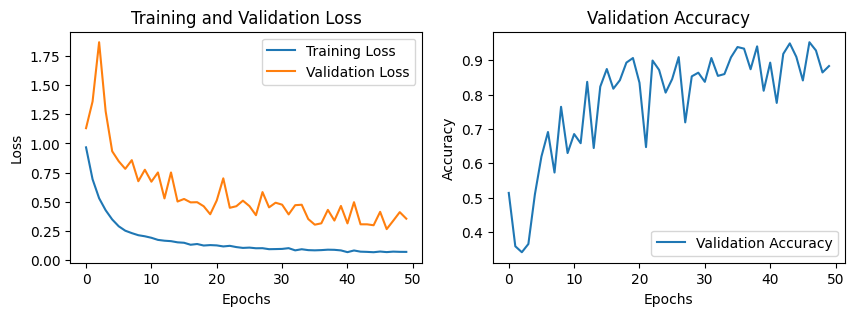

In [16]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 3))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [18]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(cnn_model, test_loader, device)
print(f'CNN Test Accuracy(with 80% train data): {test_accuracy:.2f}')


CNN Test Accuracy(with 80% train data): 0.88


### Train a Linear CLassifier with MoCO representations (on same 80% train data)

In [35]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)  ## set 1
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_1, train=False)  ## set 
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




## load trained moco model  
model_path = 'moco-model_cache-2023-12-24-17-14-15-moco/moco_model_Aug_1.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")





Number of trainable parameters: 11242176


In [36]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 80% of the original size
reduced_train_data = create_reduced_dataset(classifier_train_data, 0.8)  ## 80% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:11704


In [37]:
import numpy as np


## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like NN(linear) and SVM
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)




import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


## simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [38]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy



import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



Epoch 1/50: Train Loss: 0.7183, Val Loss: 0.8804, Val Acc: 0.5320
Epoch 2/50: Train Loss: 0.4246, Val Loss: 0.7577, Val Acc: 0.7013
Epoch 3/50: Train Loss: 0.3340, Val Loss: 0.6728, Val Acc: 0.7947
Epoch 4/50: Train Loss: 0.2885, Val Loss: 0.6375, Val Acc: 0.7967
Epoch 5/50: Train Loss: 0.2610, Val Loss: 0.6083, Val Acc: 0.8067
Epoch 6/50: Train Loss: 0.2416, Val Loss: 0.5617, Val Acc: 0.8373
Epoch 7/50: Train Loss: 0.2278, Val Loss: 0.5342, Val Acc: 0.8480
Epoch 8/50: Train Loss: 0.2171, Val Loss: 0.5304, Val Acc: 0.8380
Epoch 9/50: Train Loss: 0.2083, Val Loss: 0.5135, Val Acc: 0.8447
Epoch 10/50: Train Loss: 0.2019, Val Loss: 0.4967, Val Acc: 0.8500
Epoch 11/50: Train Loss: 0.1957, Val Loss: 0.4867, Val Acc: 0.8513
Epoch 12/50: Train Loss: 0.1912, Val Loss: 0.4771, Val Acc: 0.8533
Epoch 13/50: Train Loss: 0.1868, Val Loss: 0.4662, Val Acc: 0.8633
Epoch 14/50: Train Loss: 0.1827, Val Loss: 0.4467, Val Acc: 0.8827
Epoch 15/50: Train Loss: 0.1796, Val Loss: 0.4421, Val Acc: 0.8793
Epoc

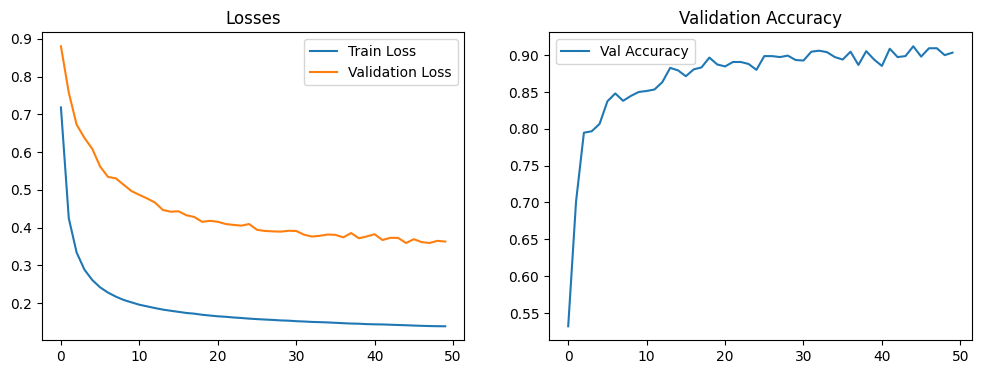

In [39]:

# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [41]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy(80% train data): {test_accuracy:.2f}')


Test Accuracy(80% train data): 0.90


### (iv) Train CNN with 70% train data

In [10]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 70% of the original size
reduced_train_data = create_reduced_dataset(train_data, 0.7)  ## 70% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:10241


In [11]:
from torch import optim

# Define loss function, optimizer, and number of training epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
epochs = 50  # Adjust as needed

# Train and evaluate the CNN
train_losses, val_losses, val_accuracies = train_and_evaluate(cnn_model, reduced_train_loader, test_loader, optimizer, criterion, epochs, device)

Epoch 1/50: Train Loss: 1.0057, Train Accuracy: 0.5568, Val Loss: 0.9861, Val Accuracy: 0.5380
Epoch 2/50: Train Loss: 0.6970, Train Accuracy: 0.6994, Val Loss: 1.6534, Val Accuracy: 0.3627
Epoch 3/50: Train Loss: 0.5729, Train Accuracy: 0.7606, Val Loss: 1.6899, Val Accuracy: 0.3833
Epoch 4/50: Train Loss: 0.4922, Train Accuracy: 0.7993, Val Loss: 0.9928, Val Accuracy: 0.4760
Epoch 5/50: Train Loss: 0.4064, Train Accuracy: 0.8392, Val Loss: 1.0533, Val Accuracy: 0.5047
Epoch 6/50: Train Loss: 0.3260, Train Accuracy: 0.8670, Val Loss: 0.7896, Val Accuracy: 0.6140
Epoch 7/50: Train Loss: 0.2850, Train Accuracy: 0.8855, Val Loss: 1.0610, Val Accuracy: 0.5127
Epoch 8/50: Train Loss: 0.2521, Train Accuracy: 0.9001, Val Loss: 0.7468, Val Accuracy: 0.6733
Epoch 9/50: Train Loss: 0.2320, Train Accuracy: 0.9062, Val Loss: 1.1551, Val Accuracy: 0.4327
Epoch 10/50: Train Loss: 0.2266, Train Accuracy: 0.9113, Val Loss: 1.2982, Val Accuracy: 0.6113
Epoch 11/50: Train Loss: 0.2037, Train Accuracy: 

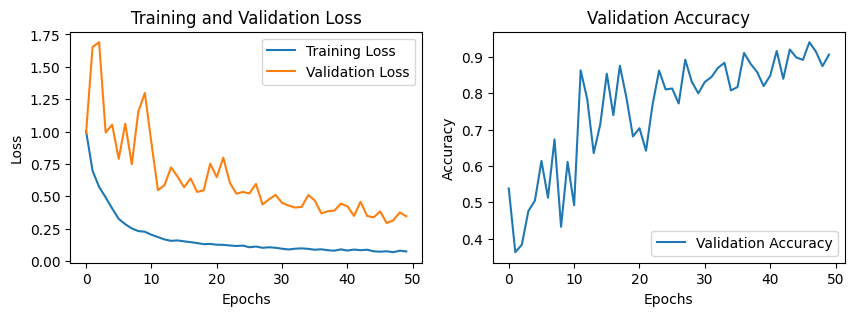

In [12]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 3))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [14]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(cnn_model, test_loader, device)
print(f'CNN Test Accuracy(with 70% train data): {test_accuracy:.2f}')


CNN Test Accuracy(with 70% train data): 0.91


### Train a Linear CLassifier with MoCO representations (on same 70% train data)

In [42]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)  ## set 1
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_1, train=False)  ## set 
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




## load trained moco model  
model_path = 'moco-model_cache-2023-12-24-17-14-15-moco/moco_model_Aug_1.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")



Number of trainable parameters: 11242176


In [43]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 70% of the original size
reduced_train_data = create_reduced_dataset(classifier_train_data, 0.7)  ## 70% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:10241


In [44]:
import numpy as np


## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like NN(linear) and SVM
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)




import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


## simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [45]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy



import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



Epoch 1/50: Train Loss: 0.7149, Val Loss: 0.8684, Val Acc: 0.5627
Epoch 2/50: Train Loss: 0.4218, Val Loss: 0.7595, Val Acc: 0.6973
Epoch 3/50: Train Loss: 0.3318, Val Loss: 0.6891, Val Acc: 0.7333
Epoch 4/50: Train Loss: 0.2876, Val Loss: 0.6338, Val Acc: 0.7933
Epoch 5/50: Train Loss: 0.2597, Val Loss: 0.5949, Val Acc: 0.8133
Epoch 6/50: Train Loss: 0.2415, Val Loss: 0.5632, Val Acc: 0.8347
Epoch 7/50: Train Loss: 0.2275, Val Loss: 0.5468, Val Acc: 0.8333
Epoch 8/50: Train Loss: 0.2172, Val Loss: 0.5390, Val Acc: 0.8267
Epoch 9/50: Train Loss: 0.2090, Val Loss: 0.5183, Val Acc: 0.8407
Epoch 10/50: Train Loss: 0.2021, Val Loss: 0.5015, Val Acc: 0.8493
Epoch 11/50: Train Loss: 0.1965, Val Loss: 0.4837, Val Acc: 0.8673
Epoch 12/50: Train Loss: 0.1915, Val Loss: 0.4755, Val Acc: 0.8693
Epoch 13/50: Train Loss: 0.1873, Val Loss: 0.4700, Val Acc: 0.8673
Epoch 14/50: Train Loss: 0.1841, Val Loss: 0.4701, Val Acc: 0.8580
Epoch 15/50: Train Loss: 0.1804, Val Loss: 0.4532, Val Acc: 0.8720
Epoc

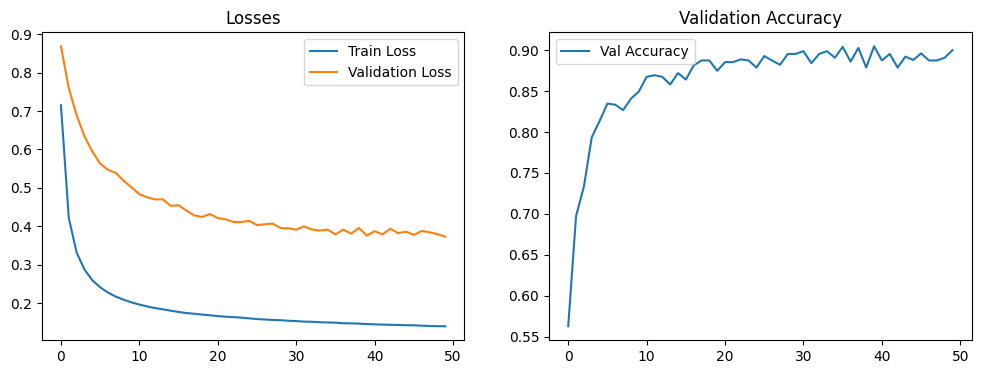

In [46]:

# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [48]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy(70% train data): {test_accuracy:.2f}')


Test Accuracy(70% train data): 0.90


### (v) Train CNN with 60% train data

In [11]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 60% of the original size
reduced_train_data = create_reduced_dataset(train_data, 0.6)  ## 60% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:8778


In [12]:
from torch import optim

# Define loss function, optimizer, and number of training epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
epochs = 50  # Adjust as needed

# Train and evaluate the CNN
train_losses, val_losses, val_accuracies = train_and_evaluate(cnn_model, reduced_train_loader, test_loader, optimizer, criterion, epochs, device)

Epoch 1/50: Train Loss: 1.0163, Train Accuracy: 0.5395, Val Loss: 1.1367, Val Accuracy: 0.4740
Epoch 2/50: Train Loss: 0.8074, Train Accuracy: 0.6310, Val Loss: 1.1515, Val Accuracy: 0.4780
Epoch 3/50: Train Loss: 0.6708, Train Accuracy: 0.7053, Val Loss: 0.9989, Val Accuracy: 0.4887
Epoch 4/50: Train Loss: 0.5769, Train Accuracy: 0.7615, Val Loss: 1.2072, Val Accuracy: 0.4473
Epoch 5/50: Train Loss: 0.4812, Train Accuracy: 0.8016, Val Loss: 1.6813, Val Accuracy: 0.3347
Epoch 6/50: Train Loss: 0.3823, Train Accuracy: 0.8443, Val Loss: 1.1040, Val Accuracy: 0.4440
Epoch 7/50: Train Loss: 0.3342, Train Accuracy: 0.8660, Val Loss: 0.8904, Val Accuracy: 0.5647
Epoch 8/50: Train Loss: 0.2855, Train Accuracy: 0.8867, Val Loss: 0.9683, Val Accuracy: 0.4867
Epoch 9/50: Train Loss: 0.2712, Train Accuracy: 0.8904, Val Loss: 0.7656, Val Accuracy: 0.6760
Epoch 10/50: Train Loss: 0.2351, Train Accuracy: 0.9061, Val Loss: 0.9998, Val Accuracy: 0.5807
Epoch 11/50: Train Loss: 0.2341, Train Accuracy: 

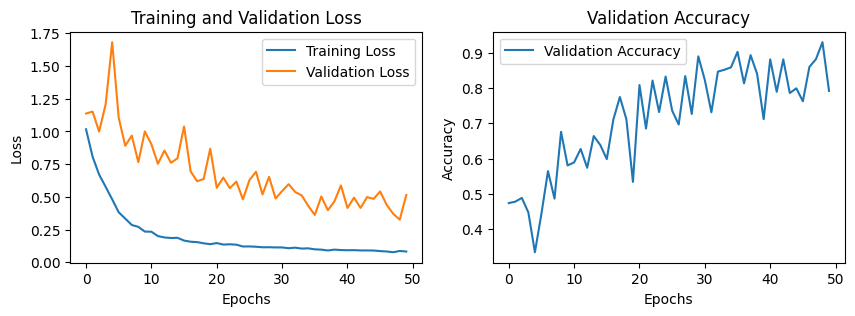

In [14]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 3))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [16]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(cnn_model, test_loader, device)
print(f'CNN Test Accuracy(with 60% train data): {test_accuracy:.2f}')


CNN Test Accuracy(with 60% train data): 0.79


### Train a Linear CLassifier with MoCO representations (on same 60% train data)

In [49]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)  ## set 1
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_1, train=False)  ## set 
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




## load trained moco model  
model_path = 'moco-model_cache-2023-12-24-17-14-15-moco/moco_model_Aug_1.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")



Number of trainable parameters: 11242176


In [50]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 60% of the original size
reduced_train_data = create_reduced_dataset(classifier_train_data, 0.6)  ## 60% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:8778


In [51]:
import numpy as np


## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like NN(linear) and SVM
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)




import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


## simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [52]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy



import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



Epoch 1/50: Train Loss: 0.7056, Val Loss: 0.8649, Val Acc: 0.5660
Epoch 2/50: Train Loss: 0.4153, Val Loss: 0.7434, Val Acc: 0.7273
Epoch 3/50: Train Loss: 0.3289, Val Loss: 0.6744, Val Acc: 0.7880
Epoch 4/50: Train Loss: 0.2854, Val Loss: 0.6216, Val Acc: 0.8160
Epoch 5/50: Train Loss: 0.2592, Val Loss: 0.5916, Val Acc: 0.8200
Epoch 6/50: Train Loss: 0.2412, Val Loss: 0.5738, Val Acc: 0.8240
Epoch 7/50: Train Loss: 0.2277, Val Loss: 0.5522, Val Acc: 0.8300
Epoch 8/50: Train Loss: 0.2182, Val Loss: 0.5432, Val Acc: 0.8253
Epoch 9/50: Train Loss: 0.2096, Val Loss: 0.5173, Val Acc: 0.8413
Epoch 10/50: Train Loss: 0.2025, Val Loss: 0.4955, Val Acc: 0.8547
Epoch 11/50: Train Loss: 0.1970, Val Loss: 0.4855, Val Acc: 0.8573
Epoch 12/50: Train Loss: 0.1921, Val Loss: 0.4916, Val Acc: 0.8413
Epoch 13/50: Train Loss: 0.1883, Val Loss: 0.4685, Val Acc: 0.8620
Epoch 14/50: Train Loss: 0.1843, Val Loss: 0.4665, Val Acc: 0.8547
Epoch 15/50: Train Loss: 0.1813, Val Loss: 0.4577, Val Acc: 0.8613
Epoc

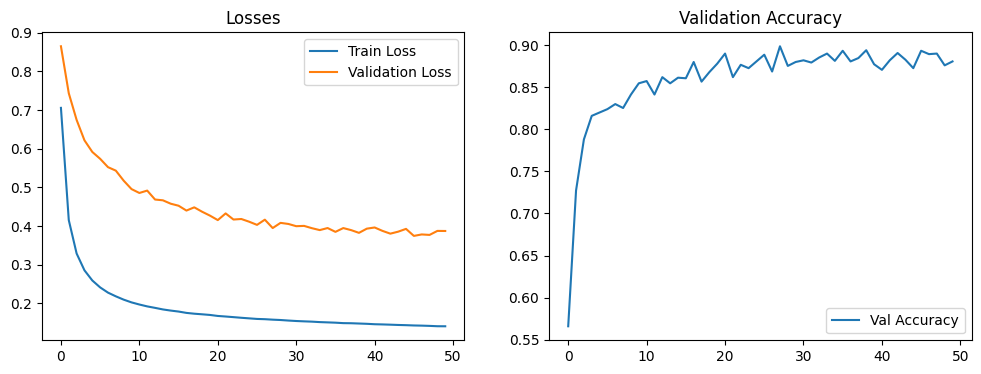

In [53]:

# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [55]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy(60% train data): {test_accuracy:.2f}')


Test Accuracy(60% train data): 0.88


### (vi) Train CNN with 50% train data

In [10]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 50% of the original size
reduced_train_data = create_reduced_dataset(train_data, 0.5)  ## 50% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:7315


In [11]:
from torch import optim

# Define loss function, optimizer, and number of training epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
epochs = 50  # Adjust as needed

# Train and evaluate the CNN
train_losses, val_losses, val_accuracies = train_and_evaluate(cnn_model, reduced_train_loader, test_loader, optimizer, criterion, epochs, device)

Epoch 1/50: Train Loss: 1.0528, Train Accuracy: 0.5230, Val Loss: 1.3415, Val Accuracy: 0.3487
Epoch 2/50: Train Loss: 0.7967, Train Accuracy: 0.6377, Val Loss: 1.6590, Val Accuracy: 0.4033
Epoch 3/50: Train Loss: 0.6776, Train Accuracy: 0.7104, Val Loss: 1.3089, Val Accuracy: 0.4260
Epoch 4/50: Train Loss: 0.5789, Train Accuracy: 0.7608, Val Loss: 1.0154, Val Accuracy: 0.5407
Epoch 5/50: Train Loss: 0.5131, Train Accuracy: 0.7895, Val Loss: 1.5694, Val Accuracy: 0.3333
Epoch 6/50: Train Loss: 0.4265, Train Accuracy: 0.8291, Val Loss: 0.9989, Val Accuracy: 0.4927
Epoch 7/50: Train Loss: 0.3658, Train Accuracy: 0.8528, Val Loss: 0.9920, Val Accuracy: 0.5207
Epoch 8/50: Train Loss: 0.3364, Train Accuracy: 0.8647, Val Loss: 1.1950, Val Accuracy: 0.4333
Epoch 9/50: Train Loss: 0.2851, Train Accuracy: 0.8882, Val Loss: 1.8060, Val Accuracy: 0.3360
Epoch 10/50: Train Loss: 0.2755, Train Accuracy: 0.8876, Val Loss: 1.3887, Val Accuracy: 0.3800
Epoch 11/50: Train Loss: 0.2391, Train Accuracy: 

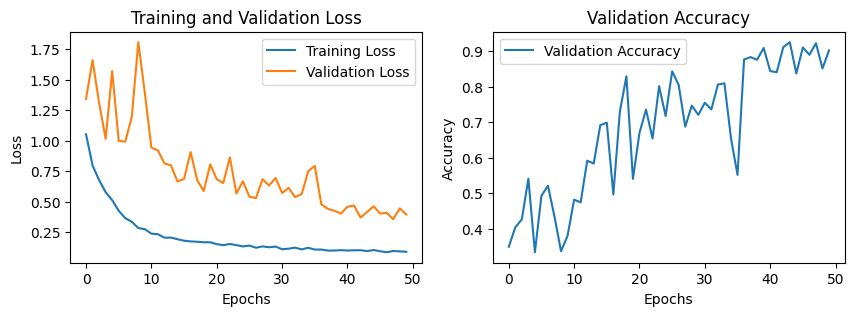

In [12]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 3))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [14]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(cnn_model, test_loader, device)
print(f'CNN Test Accuracy(with 50% train data): {test_accuracy:.2f}')


CNN Test Accuracy(with 50% train data): 0.90


### Train a Linear CLassifier with MoCO representations (on same 50% train data)

In [56]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)  ## set 1
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_1, train=False)  ## set 
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




## load trained moco model  
model_path = 'moco-model_cache-2023-12-24-17-14-15-moco/moco_model_Aug_1.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")



Number of trainable parameters: 11242176


In [57]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 50% of the original size
reduced_train_data = create_reduced_dataset(classifier_train_data, 0.5)  ## 50% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:7315


In [58]:
import numpy as np


## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like NN(linear) and SVM
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)




import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


## simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [59]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy



import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



Epoch 1/50: Train Loss: 0.6960, Val Loss: 0.8635, Val Acc: 0.5627
Epoch 2/50: Train Loss: 0.4111, Val Loss: 0.7466, Val Acc: 0.7067
Epoch 3/50: Train Loss: 0.3246, Val Loss: 0.6746, Val Acc: 0.7887
Epoch 4/50: Train Loss: 0.2815, Val Loss: 0.6358, Val Acc: 0.7953
Epoch 5/50: Train Loss: 0.2554, Val Loss: 0.6013, Val Acc: 0.8127
Epoch 6/50: Train Loss: 0.2381, Val Loss: 0.5698, Val Acc: 0.8307
Epoch 7/50: Train Loss: 0.2250, Val Loss: 0.5403, Val Acc: 0.8460
Epoch 8/50: Train Loss: 0.2148, Val Loss: 0.5177, Val Acc: 0.8647
Epoch 9/50: Train Loss: 0.2069, Val Loss: 0.5068, Val Acc: 0.8673
Epoch 10/50: Train Loss: 0.2004, Val Loss: 0.4893, Val Acc: 0.8760
Epoch 11/50: Train Loss: 0.1950, Val Loss: 0.4814, Val Acc: 0.8727
Epoch 12/50: Train Loss: 0.1901, Val Loss: 0.4888, Val Acc: 0.8567
Epoch 13/50: Train Loss: 0.1868, Val Loss: 0.4559, Val Acc: 0.8913
Epoch 14/50: Train Loss: 0.1830, Val Loss: 0.4524, Val Acc: 0.8860
Epoch 15/50: Train Loss: 0.1797, Val Loss: 0.4410, Val Acc: 0.8947
Epoc

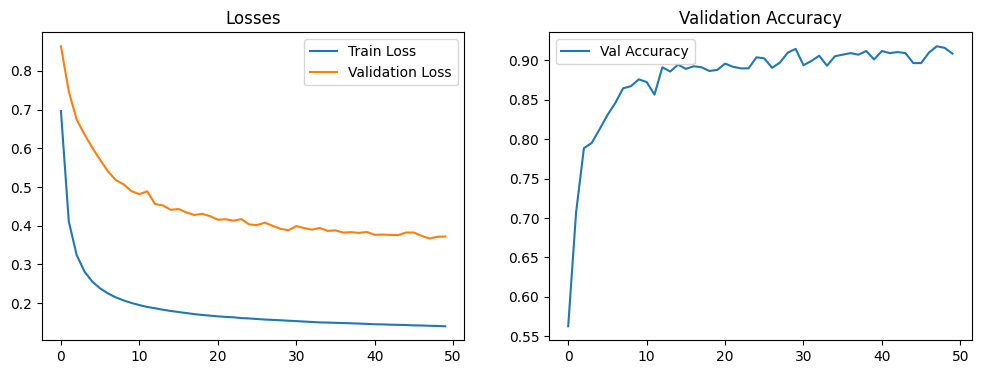

In [60]:

# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [62]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy(50% train data): {test_accuracy:.2f}')


Test Accuracy(50% train data): 0.91


### (vii) Train CNN with 40% train data

In [10]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 40% of the original size
reduced_train_data = create_reduced_dataset(train_data, 0.4)  ## 40% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:5852


In [11]:
from torch import optim

# Define loss function, optimizer, and number of training epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
epochs = 50  # Adjust as needed

# Train and evaluate the CNN
train_losses, val_losses, val_accuracies = train_and_evaluate(cnn_model, reduced_train_loader, test_loader, optimizer, criterion, epochs, device)

Epoch 1/50: Train Loss: 1.0887, Train Accuracy: 0.5115, Val Loss: 1.3479, Val Accuracy: 0.4840
Epoch 2/50: Train Loss: 0.8421, Train Accuracy: 0.6087, Val Loss: 1.1737, Val Accuracy: 0.3747
Epoch 3/50: Train Loss: 0.7864, Train Accuracy: 0.6413, Val Loss: 1.3983, Val Accuracy: 0.3480
Epoch 4/50: Train Loss: 0.6985, Train Accuracy: 0.6927, Val Loss: 1.5751, Val Accuracy: 0.3627
Epoch 5/50: Train Loss: 0.6279, Train Accuracy: 0.7316, Val Loss: 1.3772, Val Accuracy: 0.3513
Epoch 6/50: Train Loss: 0.5495, Train Accuracy: 0.7679, Val Loss: 1.1641, Val Accuracy: 0.4820
Epoch 7/50: Train Loss: 0.4992, Train Accuracy: 0.7941, Val Loss: 0.9926, Val Accuracy: 0.4613
Epoch 8/50: Train Loss: 0.4174, Train Accuracy: 0.8324, Val Loss: 1.0614, Val Accuracy: 0.4827
Epoch 9/50: Train Loss: 0.3788, Train Accuracy: 0.8515, Val Loss: 1.3325, Val Accuracy: 0.4400
Epoch 10/50: Train Loss: 0.3386, Train Accuracy: 0.8614, Val Loss: 1.1864, Val Accuracy: 0.3767
Epoch 11/50: Train Loss: 0.3074, Train Accuracy: 

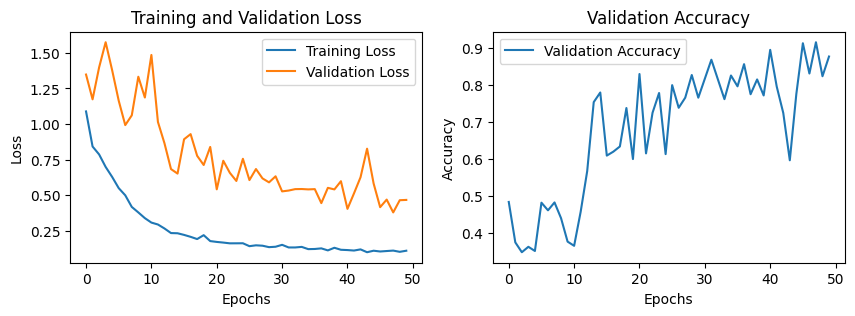

In [12]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 3))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [14]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(cnn_model, test_loader, device)
print(f'CNN Test Accuracy(with 40% train data): {test_accuracy:.2f}')


CNN Test Accuracy(with 40% train data): 0.88


### Train a Linear CLassifier with MoCO representations (on same 40% train data)

In [64]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)  ## set 1
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_1, train=False)  ## set 
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




## load trained moco model  
model_path = 'moco-model_cache-2023-12-24-17-14-15-moco/moco_model_Aug_1.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")



Number of trainable parameters: 11242176


In [65]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 40% of the original size
reduced_train_data = create_reduced_dataset(classifier_train_data, 0.4)  ## 40% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:5852


In [66]:
import numpy as np


## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like NN(linear) and SVM
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)




import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


## simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [67]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy



import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



Epoch 1/50: Train Loss: 0.7014, Val Loss: 0.8841, Val Acc: 0.5147
Epoch 2/50: Train Loss: 0.4152, Val Loss: 0.7569, Val Acc: 0.6960
Epoch 3/50: Train Loss: 0.3272, Val Loss: 0.6922, Val Acc: 0.7367
Epoch 4/50: Train Loss: 0.2831, Val Loss: 0.6307, Val Acc: 0.7967
Epoch 5/50: Train Loss: 0.2565, Val Loss: 0.6097, Val Acc: 0.8000
Epoch 6/50: Train Loss: 0.2380, Val Loss: 0.5815, Val Acc: 0.8120
Epoch 7/50: Train Loss: 0.2244, Val Loss: 0.5488, Val Acc: 0.8320
Epoch 8/50: Train Loss: 0.2142, Val Loss: 0.5452, Val Acc: 0.8213
Epoch 9/50: Train Loss: 0.2057, Val Loss: 0.5175, Val Acc: 0.8420
Epoch 10/50: Train Loss: 0.1990, Val Loss: 0.5156, Val Acc: 0.8313
Epoch 11/50: Train Loss: 0.1936, Val Loss: 0.4898, Val Acc: 0.8507
Epoch 12/50: Train Loss: 0.1884, Val Loss: 0.4876, Val Acc: 0.8493
Epoch 13/50: Train Loss: 0.1842, Val Loss: 0.4763, Val Acc: 0.8560
Epoch 14/50: Train Loss: 0.1807, Val Loss: 0.4770, Val Acc: 0.8433
Epoch 15/50: Train Loss: 0.1774, Val Loss: 0.4576, Val Acc: 0.8627
Epoc

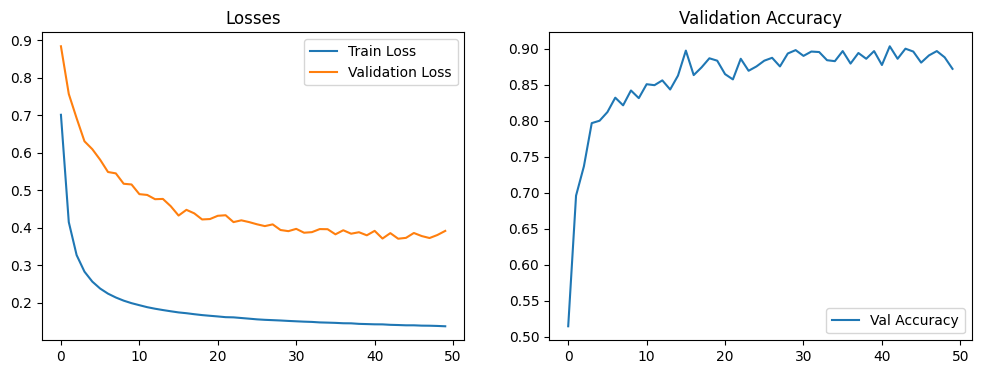

In [68]:

# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [69]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy: {test_accuracy:.2f}')


Test Accuracy: 0.87


### (viii) Train CNN with 30% train data

In [11]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 30% of the original size
reduced_train_data = create_reduced_dataset(train_data, 0.3)  ## 30% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:4389


In [12]:
from torch import optim

# Define loss function, optimizer, and number of training epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
epochs = 50  # Adjust as needed

# Train and evaluate the CNN
train_losses, val_losses, val_accuracies = train_and_evaluate(cnn_model, reduced_train_loader, test_loader, optimizer, criterion, epochs, device)

Epoch 1/50: Train Loss: 1.1775, Train Accuracy: 0.4738, Val Loss: 1.4295, Val Accuracy: 0.3513
Epoch 2/50: Train Loss: 0.8849, Train Accuracy: 0.5751, Val Loss: 1.1213, Val Accuracy: 0.4973
Epoch 3/50: Train Loss: 0.8432, Train Accuracy: 0.6068, Val Loss: 1.0441, Val Accuracy: 0.4620
Epoch 4/50: Train Loss: 0.7645, Train Accuracy: 0.6507, Val Loss: 1.0003, Val Accuracy: 0.5287
Epoch 5/50: Train Loss: 0.6999, Train Accuracy: 0.6921, Val Loss: 1.4813, Val Accuracy: 0.3433
Epoch 6/50: Train Loss: 0.6210, Train Accuracy: 0.7381, Val Loss: 1.0282, Val Accuracy: 0.4753
Epoch 7/50: Train Loss: 0.5723, Train Accuracy: 0.7629, Val Loss: 1.1682, Val Accuracy: 0.4760
Epoch 8/50: Train Loss: 0.5486, Train Accuracy: 0.7677, Val Loss: 1.3607, Val Accuracy: 0.3613
Epoch 9/50: Train Loss: 0.5167, Train Accuracy: 0.7861, Val Loss: 1.3592, Val Accuracy: 0.3740
Epoch 10/50: Train Loss: 0.4618, Train Accuracy: 0.8107, Val Loss: 1.0468, Val Accuracy: 0.4667
Epoch 11/50: Train Loss: 0.4256, Train Accuracy: 

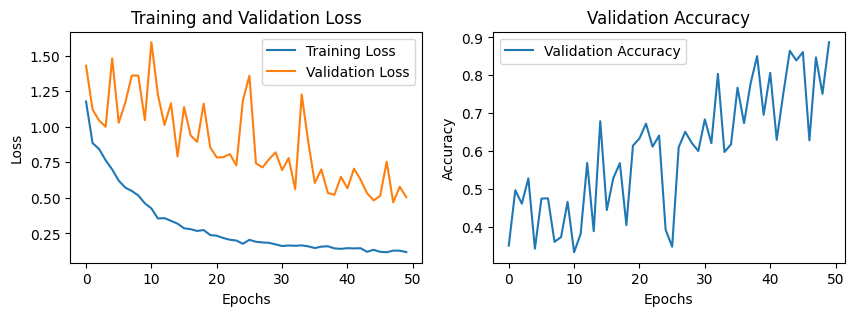

In [13]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 3))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [15]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(cnn_model, test_loader, device)
print(f'CNN Test Accuracy(with 30% train data): {test_accuracy:.2f}')


CNN Test Accuracy(with 30% train data): 0.89


### Train a Linear CLassifier with MoCO representations (on same 30% train data)

In [70]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)  ## set 1
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_1, train=False)  ## set 
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




## load trained moco model  
model_path = 'moco-model_cache-2023-12-24-17-14-15-moco/moco_model_Aug_1.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")



Number of trainable parameters: 11242176


In [71]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 30% of the original size
reduced_train_data = create_reduced_dataset(classifier_train_data, 0.3)  ## 30% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:4389


In [72]:
import numpy as np


## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like NN(linear) and SVM
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)




import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


## simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [73]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy



import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



Epoch 1/50: Train Loss: 0.6857, Val Loss: 0.8547, Val Acc: 0.5760
Epoch 2/50: Train Loss: 0.4063, Val Loss: 0.7313, Val Acc: 0.7327
Epoch 3/50: Train Loss: 0.3216, Val Loss: 0.6713, Val Acc: 0.7773
Epoch 4/50: Train Loss: 0.2795, Val Loss: 0.6285, Val Acc: 0.7987
Epoch 5/50: Train Loss: 0.2535, Val Loss: 0.6019, Val Acc: 0.8020
Epoch 6/50: Train Loss: 0.2357, Val Loss: 0.5620, Val Acc: 0.8333
Epoch 7/50: Train Loss: 0.2225, Val Loss: 0.5406, Val Acc: 0.8400
Epoch 8/50: Train Loss: 0.2125, Val Loss: 0.5231, Val Acc: 0.8447
Epoch 9/50: Train Loss: 0.2047, Val Loss: 0.5096, Val Acc: 0.8467
Epoch 10/50: Train Loss: 0.1976, Val Loss: 0.4984, Val Acc: 0.8527
Epoch 11/50: Train Loss: 0.1922, Val Loss: 0.4823, Val Acc: 0.8647
Epoch 12/50: Train Loss: 0.1877, Val Loss: 0.4839, Val Acc: 0.8487
Epoch 13/50: Train Loss: 0.1838, Val Loss: 0.4742, Val Acc: 0.8533
Epoch 14/50: Train Loss: 0.1802, Val Loss: 0.4637, Val Acc: 0.8600
Epoch 15/50: Train Loss: 0.1769, Val Loss: 0.4592, Val Acc: 0.8633
Epoc

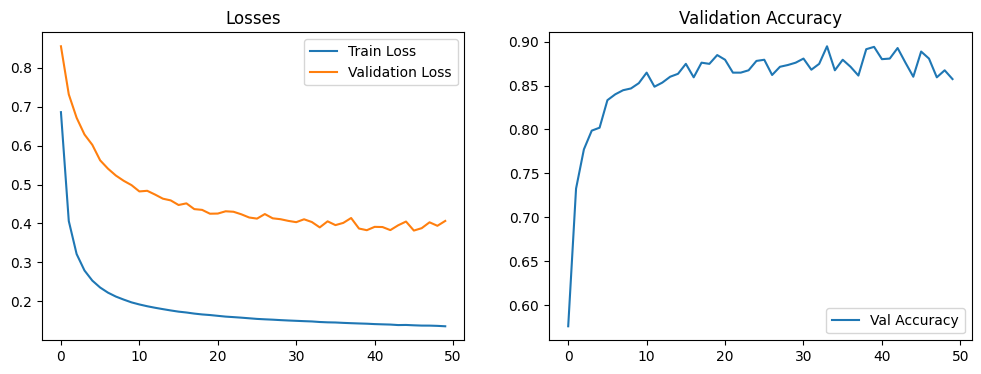

In [74]:

# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [75]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy(30% train data): {test_accuracy:.2f}')


Test Accuracy(30% train data): 0.86


### (ix) Train CNN with 20% train data

In [11]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 20% of the original size
reduced_train_data = create_reduced_dataset(train_data, 0.2)  ## 20% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:2926


In [12]:
from torch import optim

# Define loss function, optimizer, and number of training epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
epochs = 50  # Adjust as needed

# Train and evaluate the CNN
train_losses, val_losses, val_accuracies = train_and_evaluate(cnn_model, reduced_train_loader, test_loader, optimizer, criterion, epochs, device)

Epoch 1/50: Train Loss: 1.3272, Train Accuracy: 0.4427, Val Loss: 1.2873, Val Accuracy: 0.4227
Epoch 2/50: Train Loss: 0.9476, Train Accuracy: 0.5240, Val Loss: 1.0809, Val Accuracy: 0.4533
Epoch 3/50: Train Loss: 0.8973, Train Accuracy: 0.5701, Val Loss: 1.1695, Val Accuracy: 0.4613
Epoch 4/50: Train Loss: 0.8761, Train Accuracy: 0.5972, Val Loss: 1.3197, Val Accuracy: 0.3913
Epoch 5/50: Train Loss: 0.8444, Train Accuracy: 0.6097, Val Loss: 1.0698, Val Accuracy: 0.4780
Epoch 6/50: Train Loss: 0.7603, Train Accuracy: 0.6573, Val Loss: 0.9562, Val Accuracy: 0.5353
Epoch 7/50: Train Loss: 0.7153, Train Accuracy: 0.6826, Val Loss: 1.0389, Val Accuracy: 0.4567
Epoch 8/50: Train Loss: 0.6973, Train Accuracy: 0.6948, Val Loss: 1.2512, Val Accuracy: 0.3993
Epoch 9/50: Train Loss: 0.6340, Train Accuracy: 0.7267, Val Loss: 1.1206, Val Accuracy: 0.4367
Epoch 10/50: Train Loss: 0.5915, Train Accuracy: 0.7594, Val Loss: 3.1758, Val Accuracy: 0.3513
Epoch 11/50: Train Loss: 0.5772, Train Accuracy: 

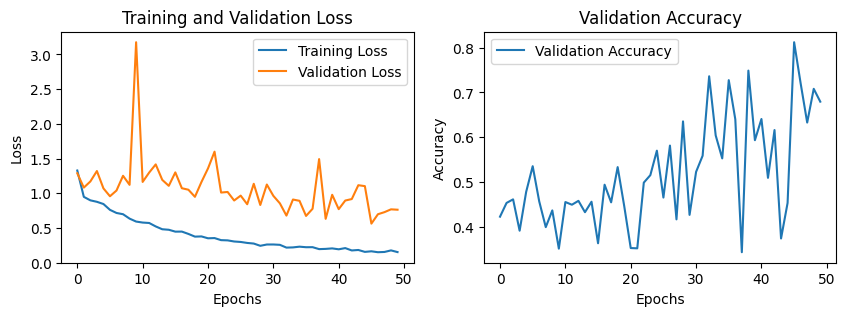

In [13]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 3))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [14]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(cnn_model, test_loader, device)
print(f'CNN Test Accuracy(with 20% train data): {test_accuracy:.2f}')


CNN Test Accuracy(with 20% train data): 0.68


### Train a Linear CLassifier with MoCO representations (on same 20% train data)

In [76]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)  ## set 1
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_1, train=False)  ## set 
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




## load trained moco model  
model_path = 'moco-model_cache-2023-12-24-17-14-15-moco/moco_model_Aug_1.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")



Number of trainable parameters: 11242176


In [77]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 20% of the original size
reduced_train_data = create_reduced_dataset(classifier_train_data, 0.2)  ## 20% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:2926


In [78]:
import numpy as np


## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like NN(linear) and SVM
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)




import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


## simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [79]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy



import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



Epoch 1/50: Train Loss: 0.7023, Val Loss: 0.8589, Val Acc: 0.5787
Epoch 2/50: Train Loss: 0.4166, Val Loss: 0.7354, Val Acc: 0.7407
Epoch 3/50: Train Loss: 0.3312, Val Loss: 0.6766, Val Acc: 0.7613
Epoch 4/50: Train Loss: 0.2877, Val Loss: 0.6337, Val Acc: 0.7933
Epoch 5/50: Train Loss: 0.2624, Val Loss: 0.5979, Val Acc: 0.8093
Epoch 6/50: Train Loss: 0.2444, Val Loss: 0.5670, Val Acc: 0.8307
Epoch 7/50: Train Loss: 0.2316, Val Loss: 0.5572, Val Acc: 0.8273
Epoch 8/50: Train Loss: 0.2219, Val Loss: 0.5384, Val Acc: 0.8333
Epoch 9/50: Train Loss: 0.2131, Val Loss: 0.5255, Val Acc: 0.8393
Epoch 10/50: Train Loss: 0.2067, Val Loss: 0.5212, Val Acc: 0.8300
Epoch 11/50: Train Loss: 0.2010, Val Loss: 0.4837, Val Acc: 0.8747
Epoch 12/50: Train Loss: 0.1962, Val Loss: 0.4798, Val Acc: 0.8720
Epoch 13/50: Train Loss: 0.1923, Val Loss: 0.4668, Val Acc: 0.8787
Epoch 14/50: Train Loss: 0.1887, Val Loss: 0.4580, Val Acc: 0.8793
Epoch 15/50: Train Loss: 0.1858, Val Loss: 0.4593, Val Acc: 0.8760
Epoc

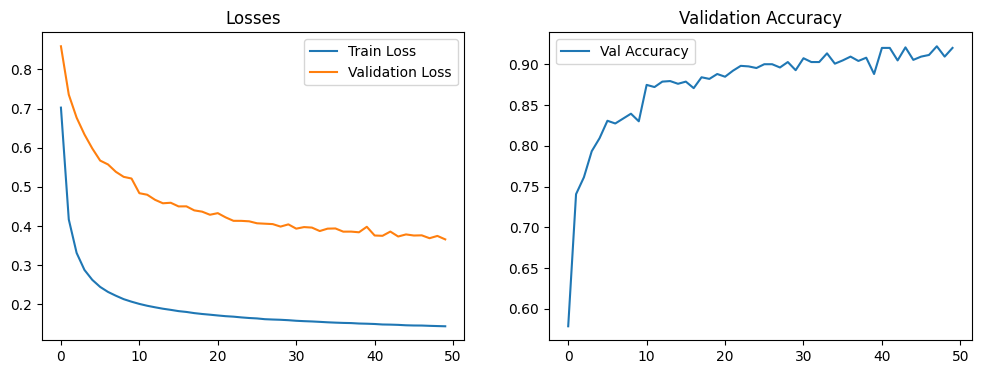

In [80]:

# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [82]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy(20% train data): {test_accuracy:.2f}')


Test Accuracy(20% train data): 0.92


### (x) Train CNN with 10% train data

In [11]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 10% of the original size
reduced_train_data = create_reduced_dataset(train_data, 0.1)  ## 10% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:1463


In [12]:
from torch import optim

# Define loss function, optimizer, and number of training epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
epochs = 50  # Adjust as needed

# Train and evaluate the CNN
train_losses, val_losses, val_accuracies = train_and_evaluate(cnn_model, reduced_train_loader, test_loader, optimizer, criterion, epochs, device)

Epoch 1/50: Train Loss: 1.7900, Train Accuracy: 0.3849, Val Loss: 2.9423, Val Accuracy: 0.3360
Epoch 2/50: Train Loss: 0.9850, Train Accuracy: 0.4979, Val Loss: 1.2886, Val Accuracy: 0.3720
Epoch 3/50: Train Loss: 0.9076, Train Accuracy: 0.5611, Val Loss: 1.1004, Val Accuracy: 0.4253
Epoch 4/50: Train Loss: 0.8861, Train Accuracy: 0.5888, Val Loss: 1.3746, Val Accuracy: 0.4900
Epoch 5/50: Train Loss: 0.8789, Train Accuracy: 0.5774, Val Loss: 2.9800, Val Accuracy: 0.3433
Epoch 6/50: Train Loss: 0.8425, Train Accuracy: 0.6122, Val Loss: 1.0937, Val Accuracy: 0.4627
Epoch 7/50: Train Loss: 0.8540, Train Accuracy: 0.6016, Val Loss: 1.0541, Val Accuracy: 0.4820
Epoch 8/50: Train Loss: 0.8142, Train Accuracy: 0.6200, Val Loss: 1.1656, Val Accuracy: 0.3873
Epoch 9/50: Train Loss: 0.8034, Train Accuracy: 0.6385, Val Loss: 1.1301, Val Accuracy: 0.5173
Epoch 10/50: Train Loss: 0.7939, Train Accuracy: 0.6456, Val Loss: 1.1801, Val Accuracy: 0.4147
Epoch 11/50: Train Loss: 0.7658, Train Accuracy: 

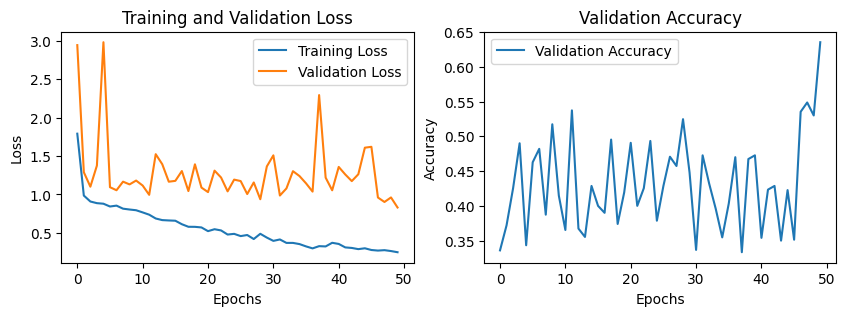

In [13]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 3))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [14]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(cnn_model, test_loader, device)
print(f'CNN Test Accuracy(with 10% train data): {test_accuracy:.2f}')


CNN Test Accuracy(with 10% train data): 0.64


### Train a Linear CLassifier with MoCO representations (on same 10% train data)

In [83]:
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os



class AFHQPair(datasets.VisionDataset):
    def __init__(self, root, transform=None, target_transform=None, train=True, is_test=False):
        super(AFHQPair, self).__init__(root, transform=transform, target_transform=target_transform)
        self.is_test = is_test
        self.train = train
        path = root  # Use root directly without appending 'train' or 'val'
        
        self.data = []
        self.targets = []
        self.classes = ['cat', 'dog', 'wild']
        self.class_to_idx = {'cat': 0, 'dog': 1, 'wild': 2}
        self.class_counts = {class_name: 0 for class_name in self.classes}
        
        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(path, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append(img_path)
                self.targets.append(label)
                self.class_counts[class_name] += 1  # Update class count
        
  
    def __getitem__(self, index):
        img_path, target = self.data[index], self.targets[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.is_test:
            return img, target  # Return image and class index for knn validation/test
        else:
            if self.train:
                im_1 = self.transform(img)
                im_2 = self.transform(img)
                return im_1, im_2  # Return image pairs for MoCo training
            else:
                return img, target  # Return image and class index for classifier training

                
    def __len__(self):
        return len(self.data)
    
    def get_class_counts(self):
        return self.class_counts
    

    

# Adjust the size in the transformations to match AFHQ images
afhq_size = 128  # size of your AFHQ images


## Augmentations
# Set 1: Basic transformations with color jittering
train_transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(afhq_size),  # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),  # Randomly flips the image horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Randomly changes brightness, contrast, saturation, and hue
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# validation test
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizes the tensor
])

# Data prepare
# Train data loader 
train_data = AFHQPair(root='afhq/train', transform=train_transform_1)  ## set 1
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

# Memory data loader - using training set with test_transform
memory_data = AFHQPair(root='afhq/train', transform=test_transform)  
memory_loader = DataLoader(memory_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For the test data loader - using validation set
test_data = AFHQPair(root='afhq/val', transform=test_transform, is_test=True)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, num_workers=4, pin_memory=True)


# For linear classifier training data loader - using training set with class indices
classifier_train_data = AFHQPair(root='afhq/train', transform=train_transform_1, train=False)  ## set 
classifier_train_loader = DataLoader(classifier_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)




## load trained moco model  
model_path = 'moco-model_cache-2023-12-24-17-14-15-moco/moco_model_Aug_1.pth'
checkpoint = torch.load(model_path)

# Initialize the MoCo model (same configuration as used during MoCo training)
model = ModelMoCo(dim=args.moco_dim, K=args.moco_k, m=args.moco_m, 
                       T=args.moco_t, arch=args.arch, 
                       bn_splits=args.bn_splits, symmetric=args.symmetric).cuda()

# Load the state
model.load_state_dict(checkpoint['state_dict'])
# If necessary, switch the model to evaluation mode
model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of trainable parameters: {num_params}")



Number of trainable parameters: 11242176


In [84]:
from torch.utils.data.dataset import Subset
import numpy as np

def create_reduced_dataset(original_dataset, reduce_percent):
    reduced_size = int(len(original_dataset) * reduce_percent)
    indices = np.random.choice(range(len(original_dataset)), reduced_size, replace=False)
    return Subset(original_dataset, indices)

# Example: Create a dataset with 10% of the original size
reduced_train_data = create_reduced_dataset(classifier_train_data, 0.1)  ## 10% train data
reduced_train_loader = DataLoader(reduced_train_data, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

print(f'Number of Train samples:{len(reduced_train_data)}')


Number of Train samples:1463


In [85]:
import numpy as np


## extract the learnt features
def get_features_and_labels(model, data_loader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.cuda()
            features = model.extract_features(inputs)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels


# Load features and labels using the get_features_and_labels function  ## extract features same like NN(linear) and SVM
train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
test_features, test_labels = get_features_and_labels(model, test_loader)




import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    


## simple linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)
    
    



In [86]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(data_loader)

def validate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy



import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    plt.show()



Epoch 1/50: Train Loss: 0.6965, Val Loss: 0.8898, Val Acc: 0.5040
Epoch 2/50: Train Loss: 0.4166, Val Loss: 0.7668, Val Acc: 0.6740
Epoch 3/50: Train Loss: 0.3286, Val Loss: 0.7009, Val Acc: 0.7200
Epoch 4/50: Train Loss: 0.2845, Val Loss: 0.6674, Val Acc: 0.7453
Epoch 5/50: Train Loss: 0.2575, Val Loss: 0.6001, Val Acc: 0.8073
Epoch 6/50: Train Loss: 0.2393, Val Loss: 0.5889, Val Acc: 0.8047
Epoch 7/50: Train Loss: 0.2265, Val Loss: 0.5606, Val Acc: 0.8193
Epoch 8/50: Train Loss: 0.2157, Val Loss: 0.5513, Val Acc: 0.8133
Epoch 9/50: Train Loss: 0.2079, Val Loss: 0.5421, Val Acc: 0.8167
Epoch 10/50: Train Loss: 0.2011, Val Loss: 0.5218, Val Acc: 0.8280
Epoch 11/50: Train Loss: 0.1956, Val Loss: 0.5024, Val Acc: 0.8393
Epoch 12/50: Train Loss: 0.1907, Val Loss: 0.4860, Val Acc: 0.8473
Epoch 13/50: Train Loss: 0.1870, Val Loss: 0.4778, Val Acc: 0.8513
Epoch 14/50: Train Loss: 0.1831, Val Loss: 0.4812, Val Acc: 0.8433
Epoch 15/50: Train Loss: 0.1803, Val Loss: 0.4709, Val Acc: 0.8493
Epoc

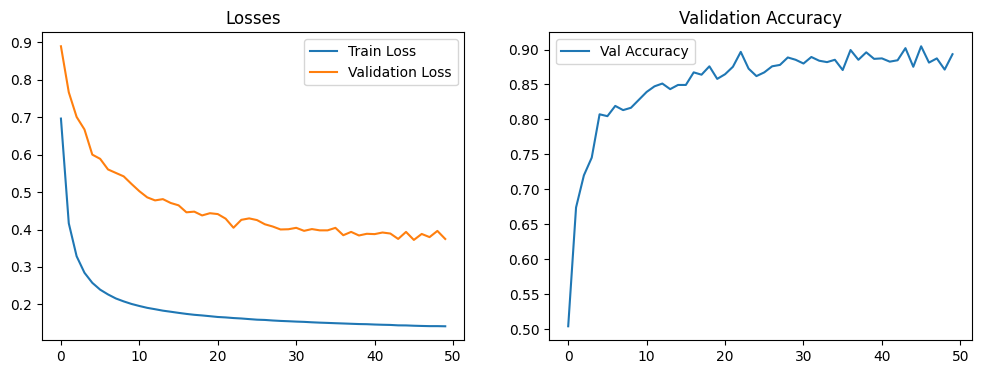

In [87]:

# Load features and labels using the get_features_and_labels function  ## extract features for NN(linear) and SVM
# train_features, train_labels = get_features_and_labels(model, classifier_train_loader)
# test_features, test_labels = get_features_and_labels(model, test_loader)

# Convert extracted features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = FeatureDataset(train_features, train_labels)
test_dataset = FeatureDataset(test_features, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Train and evaluate the linear classifier

## Freeze the Encoder
for param in model.parameters():
    param.requires_grad = False
    
## Replace the Projection Head with a Linear Classifier 
# Get the number of features from the encoder
num_features = model.encoder_q.net[9].in_features  # Check this index depending on your model architecture

num_classes = 3  # Adjust as per your dataset


device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
linear_classifier = LinearClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_classifier.parameters(), lr=0.001)
epochs = 50
train_and_evaluate(linear_classifier, train_loader, val_loader, optimizer, criterion, epochs, device)



In [88]:
def calculate_test_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the test accuracy
test_accuracy = calculate_test_accuracy(linear_classifier, val_loader, device)
print(f'Test Accuracy(10% train data): {test_accuracy:.2f}')


Test Accuracy(10% train data): 0.89
